# Analyse de l'entreprise "Lapage"

Scénario : L’entreprise Lapage était originellement une librairie physique avec plusieurs points de vente. Mais devant le succès de certains de ses produits et l’engouement de ses clients, elle a décidé depuis 2 ans d’ouvrir un site de vente en ligne.


Objectifs pédagogiques
Analyser un jeu de données avec séries temporelles pour mesurer un phénomène statistique
Réaliser des tests statistiques sur des données afin de tester et valider des hypothèses

### I. Téléchargement données et bibliothèques

#####**A**. Chargement bibliothèques

In [498]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

##### B. Téléchargement des données

In [499]:
# Monter le drive
from google.colab import drive
drive.mount('/content/drive')
chemin="//content//drive//My Drive//Projet 9"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [500]:
path="//content//drive//My Drive//Projet 9"
# Téléchargement du fichier customers.csv
df_customer=pd.read_csv(path+"//customers.csv",sep=";")
#Téléchargement de products.csv
df_product=pd.read_csv(path+"//products.csv",sep=";")
#Téléchargement de Transactions.csv
df_transactions=pd.read_csv(path+"//Transactions.csv",sep=";")

<ipython-input-500-8bdce5cbd957>:7: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_transactions=pd.read_csv(path+"//Transactions.csv",sep=";")


## II. Analyse exploratoire des fichiers

##### A. Exploration de customers

In [501]:
df_customer.head()

client_id sex  birth
0    c_4410   f   1967
1    c_7839   f   1975
2    c_1699   f   1984
3    c_5961   f   1962
4    c_5320   m   1943

In [502]:
print(f"customers contient {df_customer.shape[0]} lignes.")

customers contient 8621 lignes.


In [503]:
print("Information sur les colonnes :")
df_customer.info()

Information sur les colonnes :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8621 entries, 0 to 8620
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8621 non-null   object
 1   sex        8621 non-null   object
 2   birth      8621 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


Colonne client_id

In [504]:
print(f"Nombre de valeurs duppliqués : {df_customer['client_id'].duplicated().sum()}")

Nombre de valeurs duppliqués : 0


Colonne "sex"

In [505]:
#Lister les valeurs de la colonne sex
print("Liste des valeurs de la colonne sex : ")
print(df_customer["sex"].unique().tolist())

Liste des valeurs de la colonne sex : 
['f', 'm']


Colonne "birth"

In [506]:
# Respect du format pour les années(XXXX)
nb_invalide_birth = df_customer[~df_customer["birth"].astype(str).str.match(r"^\d{4}$")].shape[0]

print(f"Nombre de valeurs invalides dans 'birth' : {nb_invalide_birth}")

Nombre de valeurs invalides dans 'birth' : 0


In [507]:
df_customer.head()

client_id sex  birth
0    c_4410   f   1967
1    c_7839   f   1975
2    c_1699   f   1984
3    c_5961   f   1962
4    c_5320   m   1943

Création Colonne age

In [508]:
from dateutil.relativedelta import relativedelta


def convert_to_datetime(year_series):
    dates = pd.to_datetime(year_series.astype(str) + '-01-01', errors='coerce')

    if dates.dt.tz is not None:
        dates = dates.dt.tz_convert(None)
    return dates

df_customer['birth'] = convert_to_datetime(df_customer['birth'])
print("Vérification des dates converties:")
print(df_customer['birth'].head())

def calculate_age(birth_date):
    today = datetime.now()
    try:
        return today.year - birth_date.year - ((today.month, today.day) < (birth_date.month, birth_date.day))
    except:
        return None

df_customer['age'] = df_customer['birth'].apply(calculate_age)
# Filtrage des valeurs aberrantes
valeurs_aberrantes = df_customer[(df_customer['age'] < 7) | (df_customer['age'] > 120)]
print(f"\nNombre de valeurs aberrantes: {len(valeurs_aberrantes)}")
print(valeurs_aberrantes[['birth', 'age']] if not valeurs_aberrantes.empty else "Aucune valeur aberrante")

print("\nRésultat final:")
print(df_customer.head())

Vérification des dates converties:
0   1967-01-01
1   1975-01-01
2   1984-01-01
3   1962-01-01
4   1943-01-01
Name: birth, dtype: datetime64[ns]

Nombre de valeurs aberrantes: 0
Aucune valeur aberrante

Résultat final:
  client_id sex      birth  age
0    c_4410   f 1967-01-01   58
1    c_7839   f 1975-01-01   50
2    c_1699   f 1984-01-01   41
3    c_5961   f 1962-01-01   63
4    c_5320   m 1943-01-01   82


In [509]:
df_customer.head(30)

client_id sex      birth  age
0     c_4410   f 1967-01-01   58
1     c_7839   f 1975-01-01   50
2     c_1699   f 1984-01-01   41
3     c_5961   f 1962-01-01   63
4     c_5320   m 1943-01-01   82
5      c_415   m 1993-01-01   32
6      c_285   f 1967-01-01   58
7      c_160   f 1978-01-01   47
8     c_6446   m 1971-01-01   54
9     c_6866   m 1993-01-01   32
10    c_1013   m 1982-01-01   43
11    c_4389   m 1984-01-01   41
12    c_1375   m 1945-01-01   80
13    c_2998   m 2003-01-01   22
14    c_2322   f 1967-01-01   58
15    c_4701   f 1971-01-01   54
16    c_8203   f 1959-01-01   66
17    c_5019   f 1977-01-01   48
18    c_6616   f 1954-01-01   71
19    c_7049   f 1987-01-01   38
20    c_4710   m 1967-01-01   58
21    c_7900   f 2000-01-01   25
22    c_6245   m 1945-01-01   80
23    c_4279   m 1992-01-01   33
24    c_3692   f 1963-01-01   62
25    c_1361   f 1982-01-01   43
26    c_2487   f 1958-01-01   67
27    c_6884   m 1994-01-01   31
28    c_1466   f 1936-01-01   89
29    c_3213   m 2003-01-01   22

In [510]:
print("'customer' est prêt à être utilisé.")

'customer' est prêt à être utilisé.



##### B. Exploration de product

In [511]:
df_product.head()

id_prod  price  categ
0  0_1421  19.99      0
1  0_1368   5.13      0
2   0_731  17.99      0
3   1_587   4.99      1
4  0_1507   3.99      0

In [512]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3286 entries, 0 to 3285
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3286 non-null   object 
 1   price    3286 non-null   float64
 2   categ    3286 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.1+ KB


Colonne *categ*

In [513]:
valeur_unique_categ=df_product["categ"].unique().tolist()
print(f"Liste des valeurs que prend categ : {valeur_unique_categ}")

Liste des valeurs que prend categ : [0, 1, 2]


Colonne price

In [514]:
df_product["price"].describe()

count    3286.000000
mean       21.863597
std        29.849786
min         0.620000
25%         6.990000
50%        13.075000
75%        22.990000
max       300.000000
Name: price, dtype: float64

##### C. Exploration de transactions

In [515]:
df_transactions.head()

id_prod                        date session_id client_id
0  0_1259  2021-03-01 00:01:07.843138        s_1     c_329
1  0_1390  2021-03-01 00:02:26.047414        s_2     c_664
2  0_1352  2021-03-01 00:02:38.311413        s_3     c_580
3  0_1458  2021-03-01 00:04:54.559692        s_4    c_7912
4  0_1358  2021-03-01 00:05:18.801198        s_5    c_2033

In [516]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     687534 non-null  object
 1   date        687534 non-null  object
 2   session_id  687534 non-null  object
 3   client_id   687534 non-null  object
dtypes: object(4)
memory usage: 32.0+ MB


In [517]:
print(df_transactions["date"].isna().sum())
print(df_transactions["id_prod"].isna().sum())
print(df_transactions["session_id"].isna().sum())
print(df_transactions["client_id"].isna().sum())
print(f"Il y a des lignes où il n'y a aucune valeur {df_transactions['client_id'].isna().sum()}, je vais donc les effacer")


361041
361041
361041
361041
Il y a des lignes où il n'y a aucune valeur 361041, je vais donc les effacer


In [518]:
df_transactions = df_transactions.dropna(how='all')
print(f"Vérification: {df_transactions['date'].isna().sum()} lignes contenant Nan")
print(f"Nombre de ligne df_transactions: {df_transactions.shape[0]}")
print("df_transactions est prêt à être utilisé")

Vérification: 0 lignes contenant Nan
Nombre de ligne df_transactions: 687534
df_transactions est prêt à être utilisé


In [519]:
df_transactions["date"]=pd.to_datetime(df_transactions["date"])
df_transactions = df_transactions.sort_values(by='date')

## III) Jonction des tables

#### A. Jonction intérieur transactions-cutomers

In [520]:
df_merge=df_transactions.merge(df_customer,left_on="client_id",right_on="client_id",how="inner")
df_merge.head()

id_prod                       date session_id client_id sex      birth  age
0  0_1259 2021-03-01 00:01:07.843138        s_1     c_329   f 1967-01-01   58
1  0_1390 2021-03-01 00:02:26.047414        s_2     c_664   m 1960-01-01   65
2  0_1352 2021-03-01 00:02:38.311413        s_3     c_580   m 1988-01-01   37
3  0_1458 2021-03-01 00:04:54.559692        s_4    c_7912   f 1989-01-01   36
4  0_1358 2021-03-01 00:05:18.801198        s_5    c_2033   f 1956-01-01   69

#### B.Jonction intéreur merge-products

In [521]:
df_merge=df_merge.merge(df_product,how="inner",right_on="id_prod",left_on="id_prod")
df_merge.head()

id_prod                       date session_id client_id sex      birth  age  \
0  0_1259 2021-03-01 00:01:07.843138        s_1     c_329   f 1967-01-01   58   
1  0_1390 2021-03-01 00:02:26.047414        s_2     c_664   m 1960-01-01   65   
2  0_1352 2021-03-01 00:02:38.311413        s_3     c_580   m 1988-01-01   37   
3  0_1458 2021-03-01 00:04:54.559692        s_4    c_7912   f 1989-01-01   36   
4  0_1358 2021-03-01 00:05:18.801198        s_5    c_2033   f 1956-01-01   69   

   price  categ  
0  11.99      0  
1  19.37      0  
2   4.50      0  
3   6.55      0  
4  16.49      0

## IV) Analyse des indicateurs de performances

### 0) Analyse du prix et nombre article

##### Prix général et nombre article général

In [522]:
prix_moyen = df_merge['price'].mean()
prix_median = df_merge["price"].median()

print(f"Prix moyen articles : {round(prix_moyen, 2)} euros.")
print(f"Médiane du prix articles : {prix_median} euros.")

if prix_moyen < prix_median:
    print(f"Asymétrie distribution à gauche.")
else:
    print(f"Asymétrie distribution à droite.")
df_merge["price"].describe()

Prix moyen articles : 17.49 euros.
Médiane du prix articles : 13.99 euros.
Asymétrie distribution à droite.


count    687534.000000
mean         17.493918
std          18.238337
min           0.620000
25%           8.990000
50%          13.990000
75%          19.080000
max         300.000000
Name: price, dtype: float64

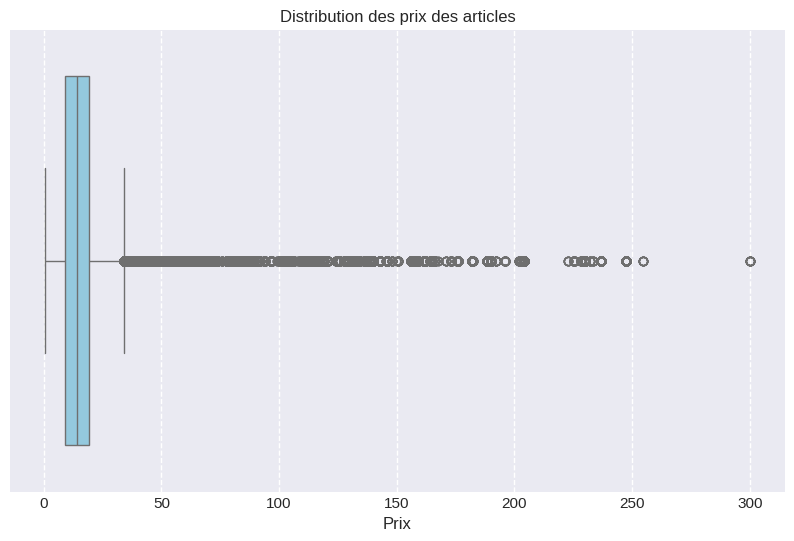

In [523]:
plt.figure(figsize=(10,6))
sn.boxplot(x=df_merge["price"],color="skyblue")
plt.title("Distribution des prix des articles")
plt.xlabel("Prix")
plt.grid(axis='x',linestyle="--")
plt.show()

##### Nombre d'article distincts vendus par rapport au nombre présent aux magasins

In [524]:
# liste produits vendus
produits_vendus_ids = df_merge["id_prod"].unique()

produits_distincts_vendus = len(produits_vendus_ids)
produits_distincts_presents_librairie = df_product.shape[0]

# produits sans ventes
produits_sans_ventes = df_product[~df_product["id_prod"].isin(produits_vendus_ids)]
nb_produits_sans_ventes = len(produits_sans_ventes)

print(f"Nombre de produits distincts vendus : {produits_distincts_vendus}/{produits_distincts_presents_librairie}")
print(f"Pourcentage sans ventes : {round(100-(produits_distincts_vendus/produits_distincts_presents_librairie)*100,2)}%")
print(f"Total articles non vendus : {nb_produits_sans_ventes}")

# Analyse par catégorie
if not produits_sans_ventes.empty:

    stats_sans_ventes = produits_sans_ventes.groupby("categ").size().reset_index(name='nb_sans_ventes')
    stats_total = df_product.groupby("categ").size().reset_index(name='nb_total')

    stats_completes = stats_sans_ventes.merge(stats_total, on="categ")
    stats_completes["pourcentage"] = round((stats_completes["nb_sans_ventes"] / stats_completes["nb_total"]) * 100, 2)

    stats_completes = stats_completes.sort_values("nb_sans_ventes", ascending=False)

    print("\nDétail par catégorie:")
    print(stats_completes)



Nombre de produits distincts vendus : 3265/3286
Pourcentage sans ventes : 0.64%
Total articles non vendus : 21

Détail par catégorie:
   categ  nb_sans_ventes  nb_total  pourcentage
0      0              16      2308         0.69
2      2               3       239         1.26
1      1               2       739         0.27


##### Caractéristique du prix par catégorie


In [525]:
df_cat0=df_merge[df_merge["categ"]==0]
print("CATEGORIE 0 :")
df_cat0["price"].describe()

CATEGORIE 0 :


count    415459.000000
mean         10.638188
std           4.933527
min           0.620000
25%           6.290000
50%           9.990000
75%          14.450000
max          40.990000
Name: price, dtype: float64

In [526]:
df_cat1=df_merge[df_merge["categ"]==1]
print("CATEGORIE 1")
df_cat1["price"].describe()

CATEGORIE 1


count    235592.000000
mean         20.491600
std           7.579606
min           2.000000
25%          15.810000
50%          19.080000
75%          24.980000
max          80.990000
Name: price, dtype: float64

In [527]:
df_cat2=df_merge[df_merge["categ"]==2]
print("CATEGORIE 2 :")
df_cat2["price"].describe()

CATEGORIE 2 :


count    36483.000000
mean        76.207412
std         39.749015
min         30.990000
25%         53.990000
50%         62.830000
75%         73.720000
max        300.000000
Name: price, dtype: float64

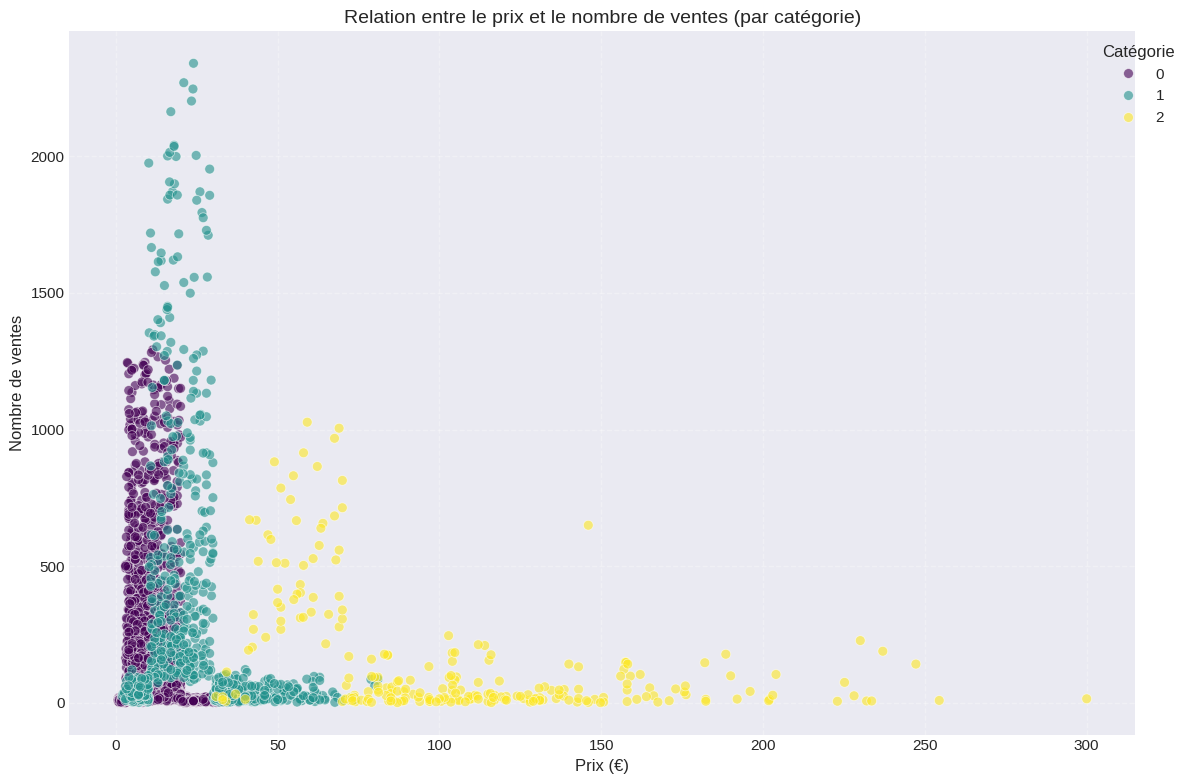

In [528]:
# Relation entre prix et le nombre de ventes
df_agg = df_merge.groupby('id_prod').agg({
    'price': 'first',
    'categ': 'first',
    'id_prod': 'count'
}).rename(columns={'id_prod': 'sales'}).reset_index()

plt.figure(figsize=(12, 8))
sn.scatterplot(
    data=df_agg,
    x='price',
    y='sales',
    hue='categ',
    palette='viridis',
    s=50,
    alpha=0.6
)

plt.title("Relation entre le prix et le nombre de ventes (par catégorie)", fontsize=14)
plt.ylabel("Nombre de ventes", fontsize=12)
plt.xlabel("Prix (€)", fontsize=12)
plt.legend(title='Catégorie', bbox_to_anchor=(1.05, 1))
plt.grid(linestyle='--', alpha=0.3)



plt.tight_layout()
plt.show()

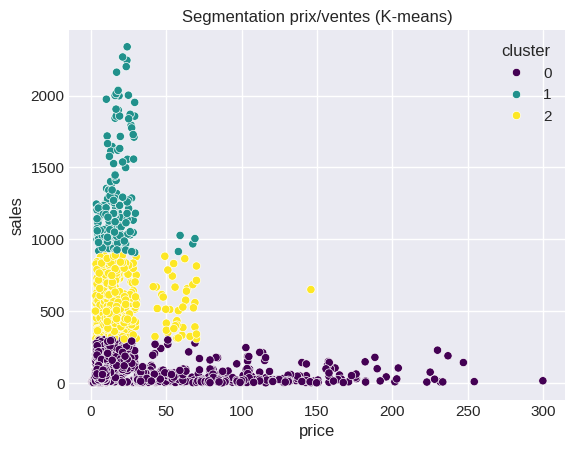

In [529]:
from sklearn.cluster import KMeans

# Clusters via K-Means
X = df_agg[['price', 'sales']].values

kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
df_agg['cluster'] = kmeans.labels_

sn.scatterplot(data=df_agg, x='price', y='sales', hue='cluster', palette='viridis')
plt.title("Segmentation prix/ventes (K-means)")
plt.show()

### 1) Chiffre d'affaire

##### Chiffre d'affaire par année

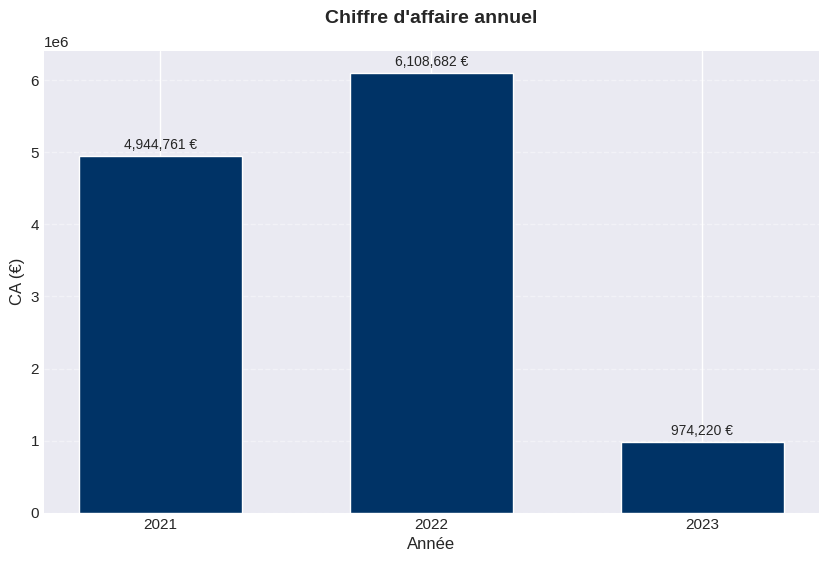

In [530]:
df_merge['year'] = df_merge['date'].dt.year.astype(str)
df_ca_annuel=df_merge.groupby('year')["price"].sum().reset_index(name="ca_total")

plt.figure(figsize=(10,6))
bars=plt.bar(
    df_ca_annuel["year"].astype(str),
    df_ca_annuel["ca_total"],
    color='#003366',
    width=0.6
)
for bar in bars :
  height=bar.get_height()
  plt.annotate(
      f'{height:,.0f} €',
        xy=(bar.get_x() + bar.get_width()/2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha='center',
        va='bottom',
        fontsize=10
    )
plt.title("Chiffre d'affaire annuel", fontsize=14,pad=20,fontweight='bold')
plt.ylabel('CA (€)', fontsize=12)
plt.xlabel('Année', fontsize=12)
plt.grid(axis='y',linestyle="--",alpha=0.4)
plt.show()


##### Chiffre d’affaires avec la moyenne hedbomadaire

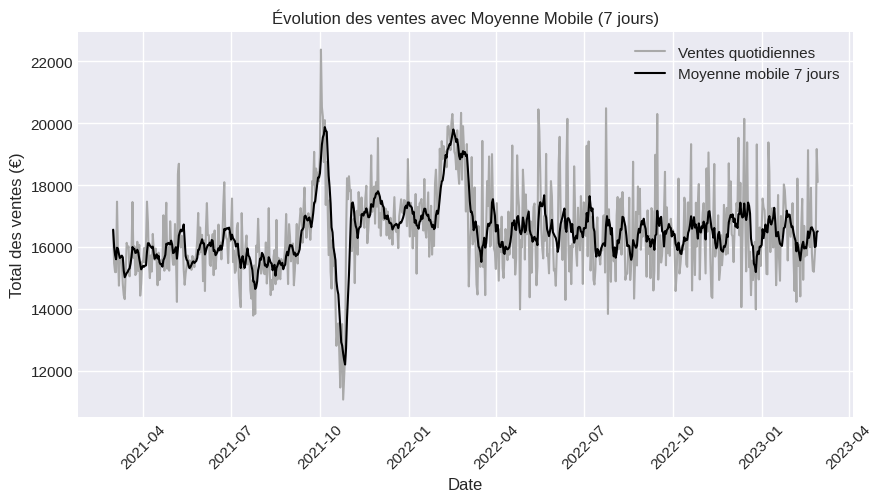

In [531]:
df_daily = df_merge.groupby(df_merge['date'].dt.date)['price'].sum().reset_index()
df_daily['moyenne_mobile_7j'] = df_daily['price'].rolling(window=7, min_periods=1).mean()

plt.figure(figsize=(10, 5))
plt.plot(df_daily['date'], df_daily['price'], linestyle='-', label='Ventes quotidiennes', color='darkgrey')  # Courbe sans points
plt.plot(df_daily['date'], df_daily['moyenne_mobile_7j'], linestyle='-', label='Moyenne mobile 7 jours', color='black')  # Moyenne mobile sans points

plt.xlabel('Date')
plt.ylabel('Total des ventes (€)')
plt.title('Évolution des ventes avec Moyenne Mobile (7 jours)')
plt.legend()

plt.xticks(rotation=45)
plt.show()


##### Chiffre d'affaire MM Mois

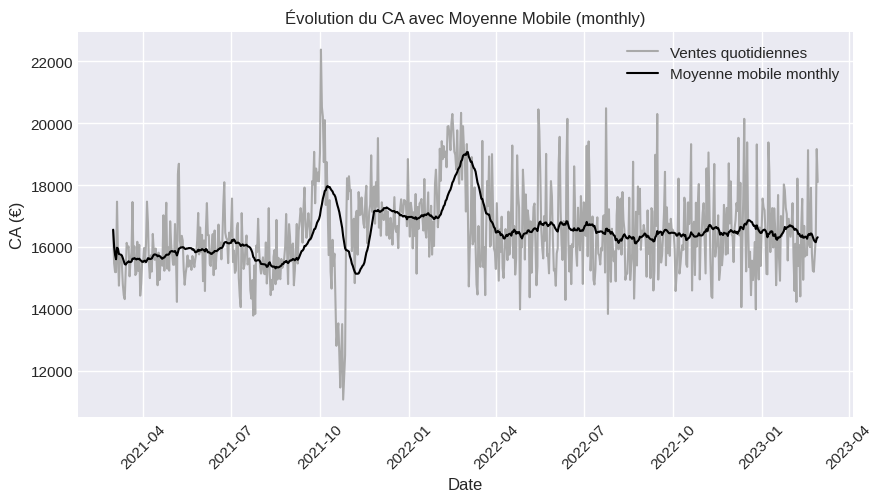

In [532]:
df_monthly = df_merge.groupby(df_merge['date'].dt.date)['price'].sum().reset_index()
df_monthly['moyenne_mobile_M'] = df_monthly['price'].rolling(window=30, min_periods=1).mean()

plt.figure(figsize=(10, 5))
plt.plot(df_monthly['date'], df_monthly['price'], linestyle='-', label='Ventes quotidiennes', color='darkgrey')  # Courbe sans points
plt.plot(df_monthly['date'], df_monthly['moyenne_mobile_M'], linestyle='-', label='Moyenne mobile monthly', color='black')  # Moyenne mobile sans points

plt.xlabel('Date')
plt.ylabel('CA (€)')
plt.title('Évolution du CA avec Moyenne Mobile (monthly)')
plt.legend()

plt.xticks(rotation=45)
plt.show()

##### Caractéristiques générales du CA (moyenne-Quartiles-Ecart type...)

In [533]:
df_ca_per_article=df_merge.groupby("id_prod")["price"].sum().reset_index(name="ca_per_article")
df_ca_per_article['ca_per_article'].describe()

count     3265.000000
mean      3683.817182
std       7502.222605
min          0.990000
25%        233.870000
50%        810.980000
75%       3458.000000
max      94893.500000
Name: ca_per_article, dtype: float64

##### Chiffre d’affaire par catégorie

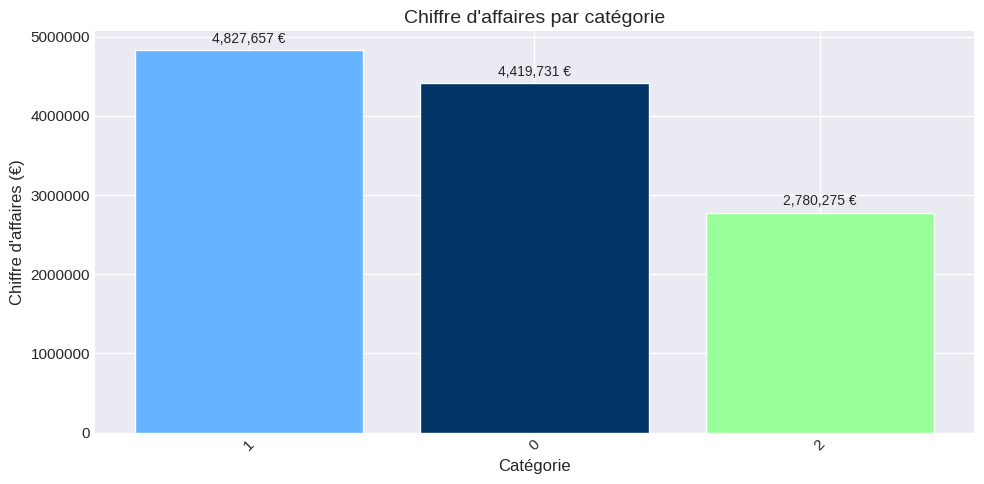

In [534]:
import matplotlib.pyplot as plt

df_category_sales = df_merge.groupby('categ')['price'].sum().reset_index()
df_category_sales = df_category_sales.sort_values(by='price', ascending=False)

category_colors = {
    0: '#003366',
    1: '#66b3ff',
    2: '#99ff99'
}

plt.figure(figsize=(10, 5))
bars = plt.bar(
    df_category_sales['categ'].astype(str),
    df_category_sales['price'],
    color=[category_colors[cat] for cat in df_category_sales['categ']]
)

plt.ticklabel_format(axis='y', style='plain')

for bar in bars:
    height = bar.get_height()
    plt.annotate(
        f'{height:,.0f} €',
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha='center', va='bottom',
        fontsize=10
    )

plt.xlabel('Catégorie', fontsize=12)
plt.ylabel('Chiffre d\'affaires (€)', fontsize=12)
plt.title('Chiffre d\'affaires par catégorie', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



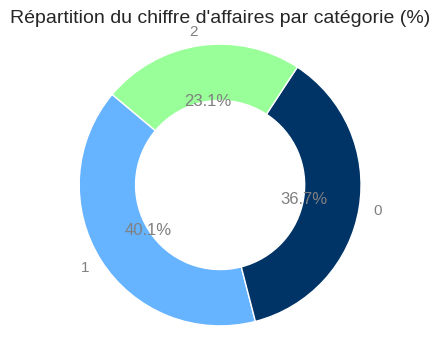

In [535]:
plt.figure(figsize=(4, 4))
labels = df_category_sales['categ'].astype(str)
sizes = df_category_sales['price']
colors = [category_colors[cat] for cat in df_category_sales['categ']]

wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops=dict(width=0.4),
    textprops={'color':'grey'}
)

plt.title('Répartition du chiffre d\'affaires par catégorie (%)', fontsize=14)
plt.axis('equal')
plt.show()


##### CA rapporté au nombre d'article par catégorie

In [536]:
df_ca = df_merge.groupby('categ').agg(
    ca_total=('price', 'sum'),
    nb_articles=('id_prod', 'nunique')
).reset_index()

df_ca['ca_moyen_par_article'] = df_ca['ca_total'] / df_ca['nb_articles']

df_ca_sorted = df_ca.sort_values('ca_moyen_par_article', ascending=False)

df_ca_sorted[['categ', 'ca_total', 'nb_articles', 'ca_moyen_par_article']]

categ    ca_total  nb_articles  ca_moyen_par_article
2      2  2780275.02          236          11780.826356
1      1  4827657.11          737           6550.416703
0      0  4419730.97         2292           1928.329394

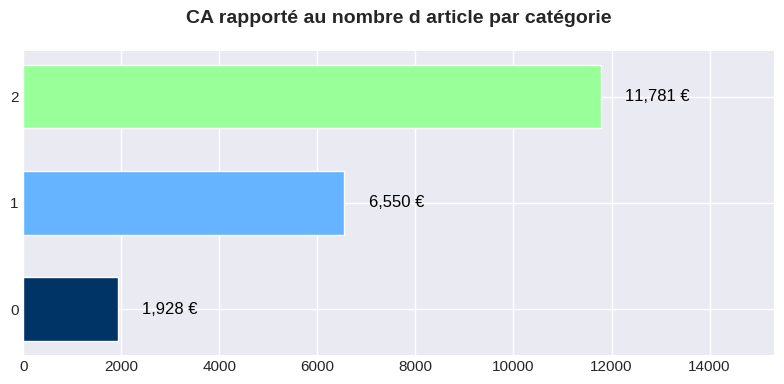

In [537]:
plt.figure(figsize=(8, 4))
ax = plt.subplot()

colors = ['#003366', '#66b3ff', '#99ff99']
bars = ax.barh(
    y=df_ca['categ'],
    width=df_ca['ca_moyen_par_article'],
    color=colors,
    height=0.6
)

for bar in bars:
    width = bar.get_width()
    ax.text(
        width + 500,
        bar.get_y() + bar.get_height()/2,
        f'{width:,.0f} €',
        va='center',
        ha='left',
        color='black',
        fontsize=12
    )

ax.set_yticks(df_ca['categ'])
ax.tick_params(axis='y', length=0)
ax.set_ylabel('')

plt.title('CA rapporté au nombre d article par catégorie', pad=20, fontweight='bold', fontsize=14)
plt.xlim(0, max(df_ca['ca_moyen_par_article']) * 1.3)
plt.tight_layout()

plt.show()

##### Répartition Hebdomadaire du CA

<ipython-input-538-f6dd4c01e586>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sn.barplot(x='day_of_week',


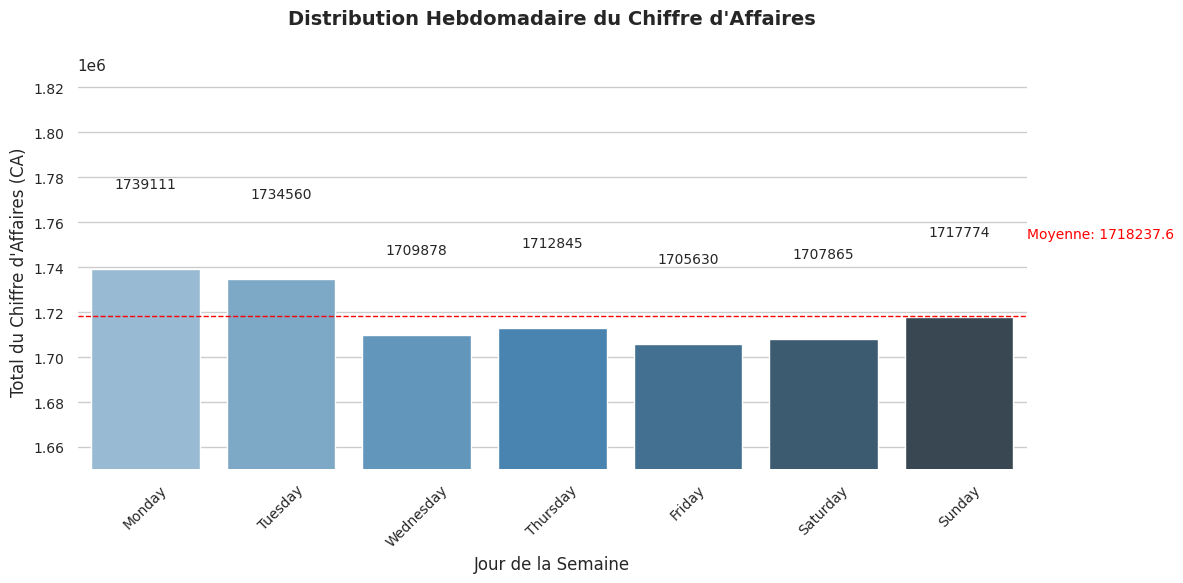

In [538]:
df_merge['day_of_week'] = df_merge['date'].dt.day_name()
df_ca_per_day = df_merge.groupby('day_of_week')['price'].sum().reset_index()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_ca_per_day['day_of_week'] = pd.Categorical(df_ca_per_day['day_of_week'],
                                               categories=days_order,
                                               ordered=True)
df_ca_per_day = df_ca_per_day.sort_values('day_of_week')

plt.figure(figsize=(12, 6))
sn.set_theme(style="whitegrid")
palette = sn.color_palette("Blues_d", n_colors=7)

ax = sn.barplot(x='day_of_week',
                y='price',
                data=df_ca_per_day,
                palette=palette)

plt.title('Distribution Hebdomadaire du Chiffre d\'Affaires\n',
          fontsize=14,
          fontweight='bold',
          pad=20)
plt.xlabel('Jour de la Semaine', fontsize=12)
plt.ylabel('Total du Chiffre d\'Affaires (CA)', fontsize=12)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)

for p in ax.patches:
    height = p.get_height()
    y_min = plt.ylim()[0]
    y_offset = 0.02 * (df_ca_per_day['price'].max() - y_min)
    plt.text(p.get_x() + p.get_width()/2,
             height + y_offset,
             '{:1.0f}'.format(height),
             ha='center',
             va='bottom',
             fontsize=10)

mean_val = df_ca_per_day['price'].mean()
plt.axhline(mean_val,
            color='red',
            linestyle='--',
            linewidth=1)
plt.text(6.5,
         mean_val + max(df_ca_per_day['price'])*0.02,
         f'Moyenne: {mean_val:.1f}',
         color='red',
         fontsize=10)

plt.ylim(1650000, df_ca_per_day['price'].max() * 1.05)

sn.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


##### Distribution du CA en fonction des heures

<ipython-input-539-f1b6b9282376>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sn.barplot(x='hour',


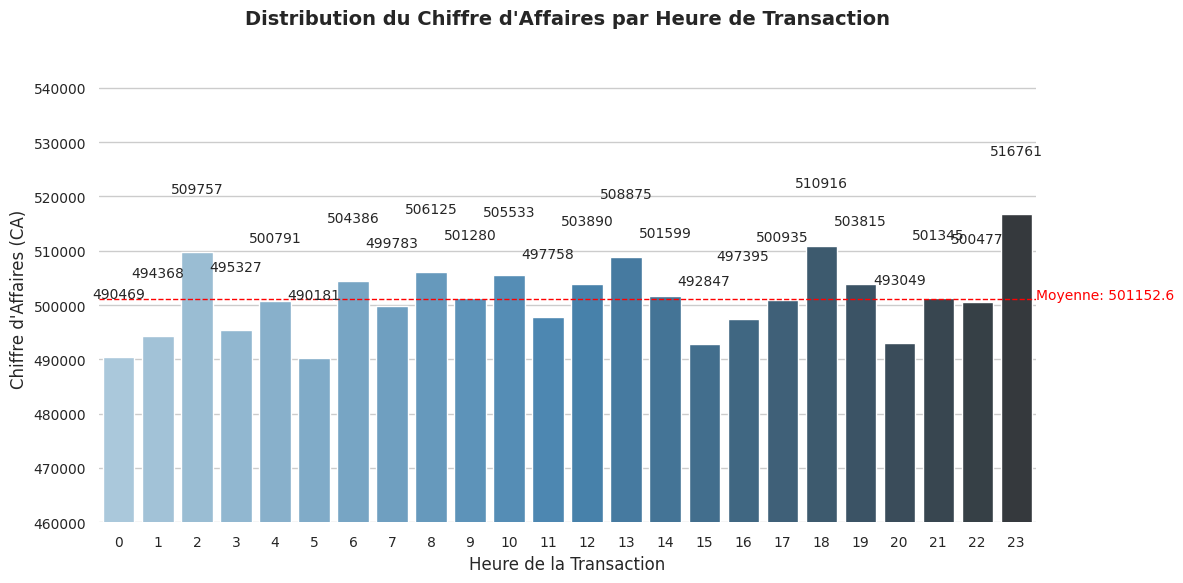

In [539]:
df_merge['hour'] = df_merge['date'].dt.hour
df_ca_per_hour = df_merge.groupby('hour')['price'].sum().reset_index()

plt.figure(figsize=(12, 6))
sn.set_theme(style="whitegrid")
palette = sn.color_palette("Blues_d", n_colors=len(df_ca_per_hour))

ax = sn.barplot(x='hour',
                y='price',
                data=df_ca_per_hour,
                palette=palette)

plt.title('Distribution du Chiffre d\'Affaires par Heure de Transaction\n',
          fontsize=14,
          fontweight='bold',
          pad=20)
plt.xlabel('Heure de la Transaction', fontsize=12)
plt.ylabel('Chiffre d\'Affaires (CA)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

for p in ax.patches:
    height = p.get_height()
    y_min = plt.ylim()[0]
    y_offset = 0.02 * (df_ca_per_hour['price'].max() - y_min)
    plt.text(p.get_x() + p.get_width()/2,
             height + y_offset,
             '{:1.0f}'.format(height),
             ha='center',
             va='bottom',
             fontsize=10)

mean_val = df_ca_per_hour['price'].mean()
plt.axhline(mean_val,
            color='red',
            linestyle='--',
            linewidth=1)

plt.text(
     x=df_ca_per_hour['hour'].max() + 0.5,
     y=mean_val,
     s=f'Moyenne: {mean_val:.1f}',
     color='red',
     fontsize=10
)

plt.ylim(460000, df_ca_per_hour['price'].max() * 1.05)

sn.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


### 2) Clients Distincts


##### Nombre de clients par mois

   year_month  client_id
0     2021-03       5676
1     2021-04       5674
2     2021-05       5644
3     2021-06       5659
4     2021-07       5672
5     2021-08       5642
6     2021-09       5693
7     2021-10       6190
8     2021-11       5875
9     2021-12       5867
10    2022-01       5809
11    2022-02       5729
12    2022-03       5835
13    2022-04       5695
14    2022-05       5843
15    2022-06       5717
16    2022-07       5778
17    2022-08       5805
18    2022-09       5738
19    2022-10       5755
20    2022-11       5749
21    2022-12       5765
22    2023-01       5828
23    2023-02       5587
Moyenne du nombre de clients par mois: 5759.38


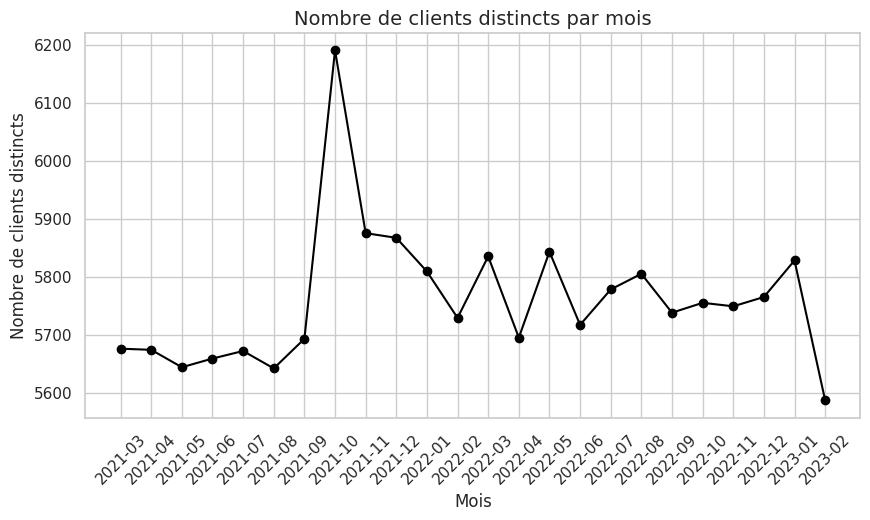

In [540]:
df_merge['year_month'] = df_merge['date'].dt.to_period('M')
df_clients_per_month = df_merge.groupby('year_month')['client_id'].nunique().reset_index()
average_clients_per_month = df_clients_per_month['client_id'].mean()

print(df_clients_per_month)
print(f"Moyenne du nombre de clients par mois: {average_clients_per_month:.2f}")

plt.figure(figsize=(10, 5))
plt.plot(df_clients_per_month['year_month'].astype(str), df_clients_per_month['client_id'], marker='o', color='black')

plt.xlabel('Mois', fontsize=12)
plt.ylabel('Nombre de clients distincts', fontsize=12)
plt.title('Nombre de clients distincts par mois', fontsize=14)

plt.xticks(rotation=45)
plt.show()

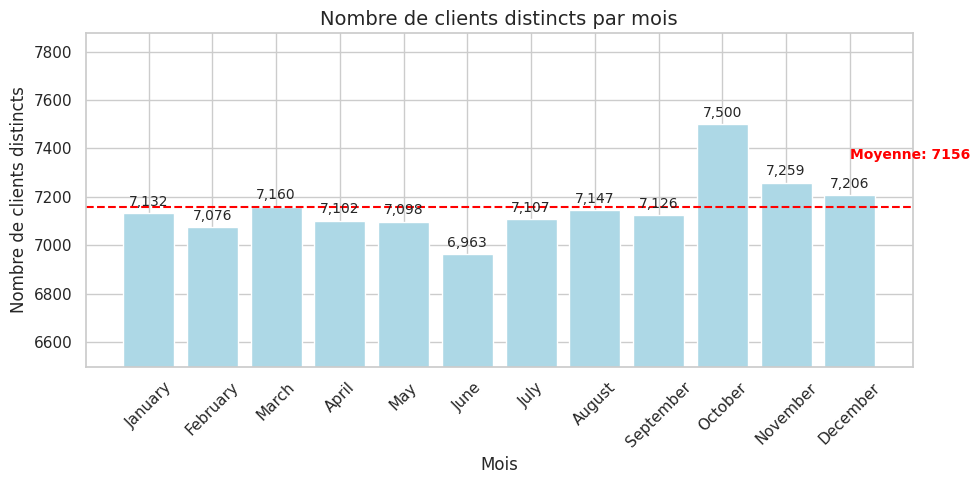

In [541]:
import matplotlib.pyplot as plt
import pandas as pd

df_clients_per_month = df_merge.groupby(df_merge['date'].dt.month)['client_id'].nunique().reset_index()

df_clients_per_month['month_name'] = df_clients_per_month['date'].apply(lambda x: pd.to_datetime(f'2021-{x:02d}-01').strftime('%B'))

plt.figure(figsize=(10, 5))
bars = plt.bar(df_clients_per_month['month_name'], df_clients_per_month['client_id'], color='lightblue')

for bar in bars:
    height = bar.get_height()
    plt.annotate(
        f'{height:,}',
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha='center', va='bottom',
        fontsize=10
    )

mean_clients = df_clients_per_month['client_id'].mean()
plt.axhline(y=mean_clients, color='red', linestyle='--', linewidth=1.5)
plt.text(
    len(df_clients_per_month) - 1,
    mean_clients + 200,
    f'Moyenne: {mean_clients:.0f}',
    color='red',
    fontsize=10,
    fontweight='bold'
)

plt.xlabel('Mois', fontsize=12)
plt.ylabel('Nombre de clients distincts', fontsize=12)
plt.title('Nombre de clients distincts par mois', fontsize=14)

plt.xticks(rotation=45)
plt.ylim(6500, df_clients_per_month['client_id'].max() * 1.05)
plt.tight_layout()
plt.show()



### 3) Analyse des Ventes

###### Ventes Général

In [542]:
df_sells_per_products=df_merge.groupby('id_prod')['id_prod'].count().reset_index(name="nb_ventes")
df_sells_per_products.describe()

nb_ventes
count  3265.000000
mean    210.577029
std     337.807282
min       1.000000
25%      17.000000
50%      57.000000
75%     242.000000
max    2340.000000

###### Nombre de vente par année

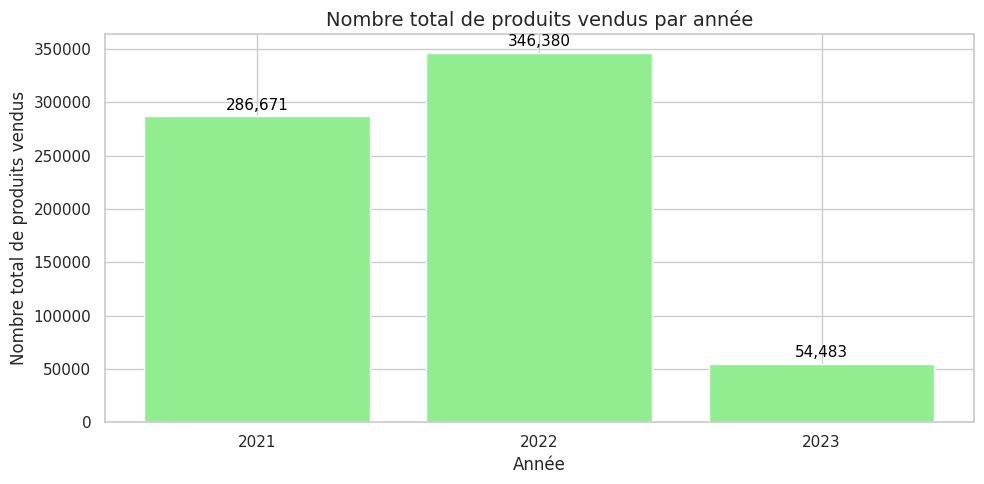

In [543]:

df_products_per_year = df_merge.groupby('year')['id_prod'].count().reset_index()

plt.figure(figsize=(10, 5))
bars = plt.bar(df_products_per_year['year'], df_products_per_year['id_prod'], color='lightgreen')

plt.xlabel('Année', fontsize=12)
plt.ylabel('Nombre total de produits vendus', fontsize=12)
plt.title('Nombre total de produits vendus par année', fontsize=14)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + max(df_products_per_year['id_prod']) * 0.01,
        f'{height:,}',
        ha='center',
        va='bottom',
        fontsize=11,
        color='black'
    )

plt.tight_layout()
plt.show()



###### Vente par catégorie de produits

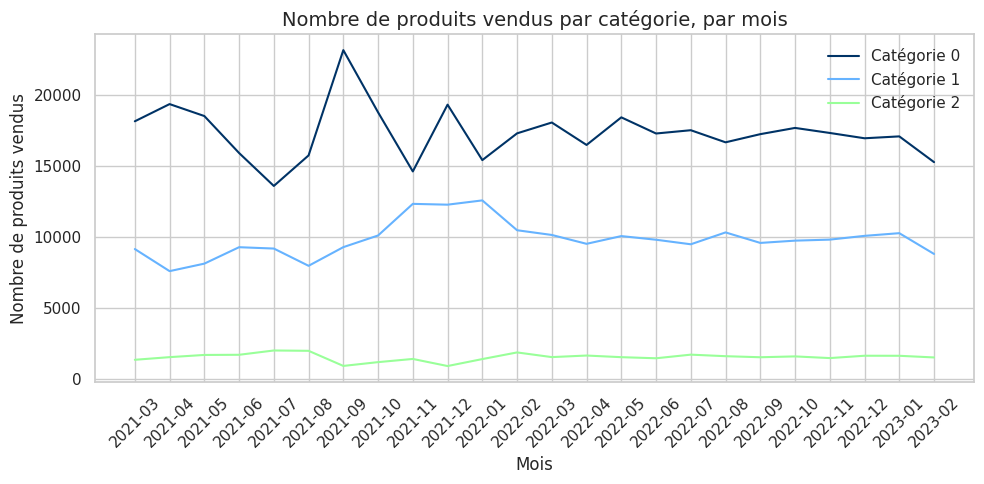

In [544]:
import matplotlib.pyplot as plt

df_products_per_category_month = df_merge.groupby(['year_month', 'categ'])['id_prod'].count().reset_index()

category_colors = {
    0: '#003366',
    1: '#66b3ff',
    2: '#99ff99'
}

plt.figure(figsize=(10, 5))

for category in df_products_per_category_month['categ'].unique():
    category_data = df_products_per_category_month[df_products_per_category_month['categ'] == category]
    plt.plot(
        category_data['year_month'].astype(str),
        category_data['id_prod'],
        label=f'Catégorie {category}',
        color=category_colors[category]
    )

plt.xlabel('Mois', fontsize=12)
plt.ylabel('Nombre de produits vendus', fontsize=12)
plt.title('Nombre de produits vendus par catégorie, par mois', fontsize=14)
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


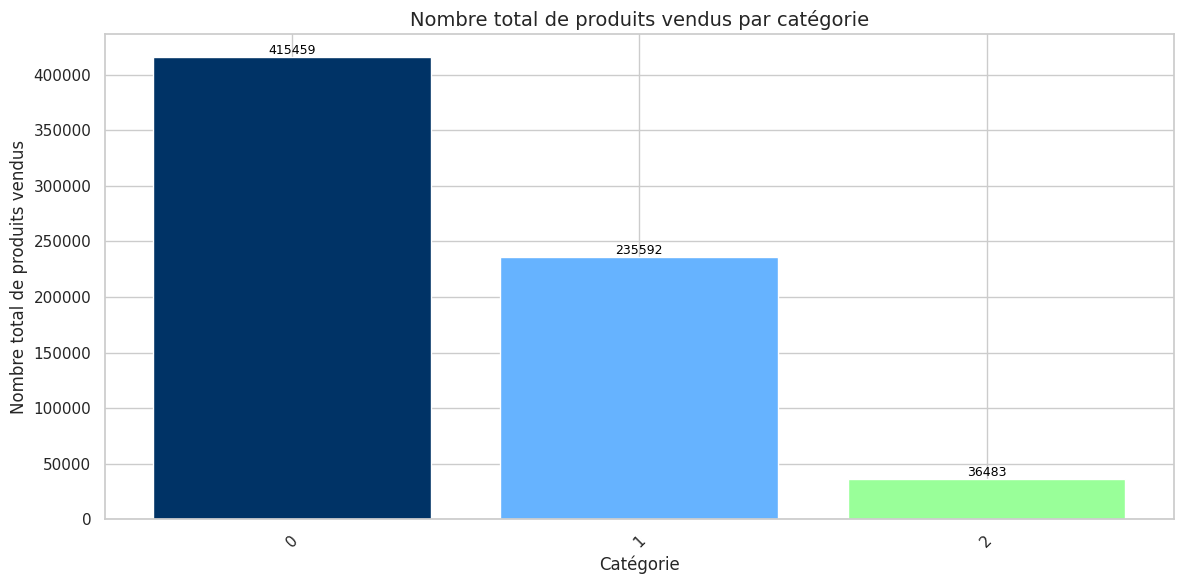

In [545]:
import matplotlib.pyplot as plt
import pandas as pd

df_products_per_category = df_merge.groupby('categ')['id_prod'].count().reset_index()
df_products_per_category = df_products_per_category.sort_values(by='id_prod', ascending=False)

category_colors = {
    0: '#003366',
    1: '#66b3ff',
    2: '#99ff99'
}

plt.figure(figsize=(12, 6))
bars = plt.bar(
    df_products_per_category['categ'].astype(str),
    df_products_per_category['id_prod'],
    color=[category_colors[cat] for cat in df_products_per_category['categ']]
)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 100,
        f'{int(height)}',
        ha='center', va='bottom',
        fontsize=9, color='black'
    )

plt.xlabel('Catégorie', fontsize=12)
plt.ylabel('Nombre total de produits vendus', fontsize=12)
plt.title('Nombre total de produits vendus par catégorie', fontsize=14)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



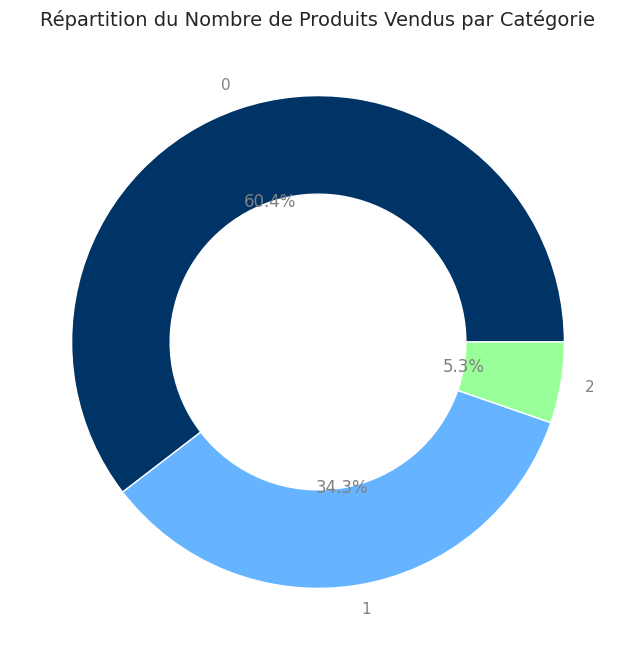

In [546]:
import matplotlib.pyplot as plt
import pandas as pd

df_products_per_category = df_merge.groupby('categ')['id_prod'].count().reset_index()

df_products_per_category = df_products_per_category.sort_values(by='id_prod', ascending=False)

category_colors = {
    0: '#003366',
    1: '#66b3ff',
    2: '#99ff99' }


plt.figure(figsize=(8, 8))
plt.pie(
    df_products_per_category['id_prod'],
    labels=df_products_per_category['categ'],
    autopct='%1.1f%%',

    textprops={'color':'gray'},
    colors=[category_colors[c] for c in df_products_per_category['categ']],
    wedgeprops={'edgecolor': 'white', 'width': 0.4}  # ➔ effet "donut"
)

plt.title('Répartition du Nombre de Produits Vendus par Catégorie', fontsize=14)
plt.gca().set_aspect('equal')
plt.show()


###### Nombre de vente rapporté aux nombres d'articles par catégories

In [547]:
df_ventes = df_merge.groupby('categ').agg(
    total_ventes=('id_prod', 'count'),
    nb_articles=('id_prod', 'nunique')
).reset_index()

df_ventes['ventes_moy_par_article'] = df_ventes['total_ventes'] / df_ventes['nb_articles']

df_ventes_sorted = df_ventes.sort_values('ventes_moy_par_article', ascending=False)
df_ventes_sorted

categ  total_ventes  nb_articles  ventes_moy_par_article
1      1        235592          737              319.663501
0      0        415459         2292              181.264834
2      2         36483          236              154.588983

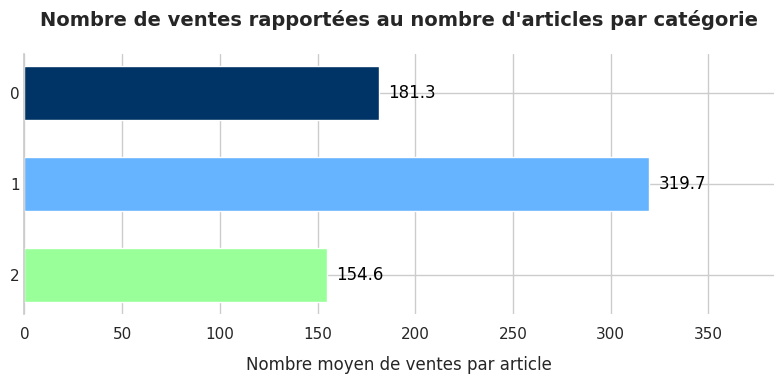

In [548]:
import matplotlib.pyplot as plt

color_map = {
    0: '#003366',
    1: '#66b3ff',
    2: '#99ff99'
}

df_sorted = df_ventes_sorted.sort_values(by='ventes_moy_par_article', ascending=False)

colors = df_sorted['categ'].map(color_map)

plt.figure(figsize=(8, 4))
ax = plt.subplot()

bars = ax.barh(
    y=df_sorted['categ'],
    width=df_sorted['ventes_moy_par_article'],
    color=colors,
    height=0.6
)

for bar in bars:
    width = bar.get_width()
    ax.text(
        width + 5,
        bar.get_y() + bar.get_height() / 2,
        f'{width:.1f}',
        va='center',
        ha='left',
        color='black',
        fontsize=12
    )

ax.invert_yaxis()

ax.set_yticks(df_sorted['categ'])
ax.set_yticklabels(df_sorted['categ'])
ax.tick_params(axis='y', length=0)
ax.set_ylabel('')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.title("Nombre de ventes rapportées au nombre d'articles par catégorie", pad=20, fontweight='bold', fontsize=14)
plt.xlabel('Nombre moyen de ventes par article', labelpad=10)
plt.xlim(0, df_sorted['ventes_moy_par_article'].max() * 1.2)

plt.tight_layout()
plt.show()




###### Saisonnalité des ventes (Mois)

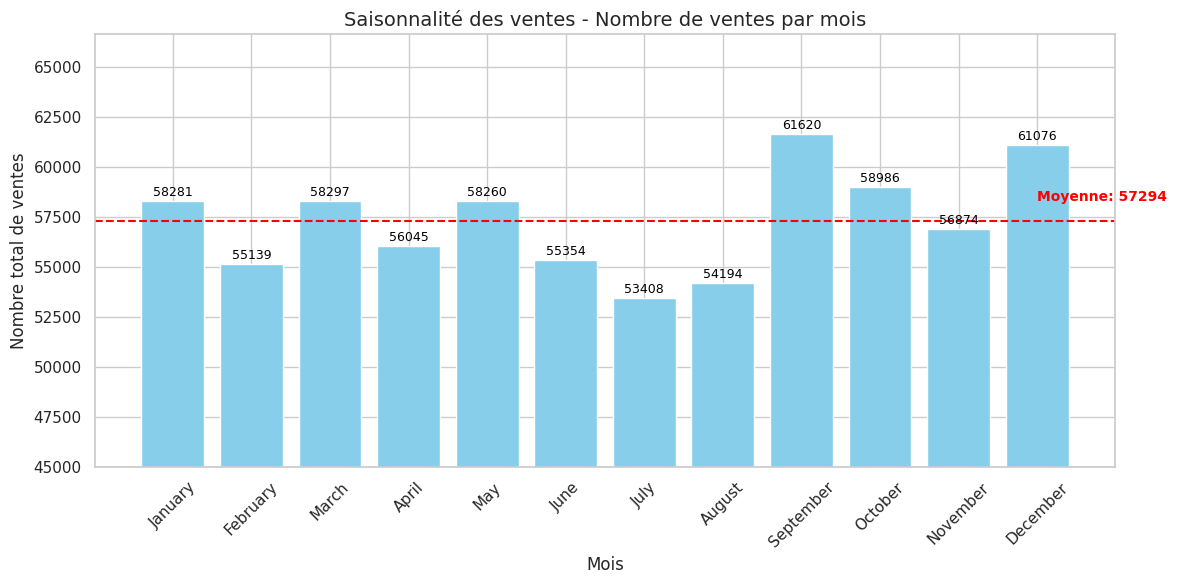

In [549]:
df_merge["month"]=df_merge["date"].dt.month

df_sales_per_month = df_merge.groupby('month')['id_prod'].count().reset_index()

df_sales_per_month['month_name'] = df_sales_per_month['month'].apply(lambda x: pd.to_datetime(f'2021-{x:02d}-01').strftime('%B'))

df_sales_per_month = df_sales_per_month.sort_values('month')

plt.figure(figsize=(12, 6))
bars = plt.bar(
    df_sales_per_month['month_name'],
    df_sales_per_month['id_prod'],
    color='skyblue'
)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 100,
        f'{int(height)}',
        ha='center', va='bottom',
        fontsize=9, color='black'
    )

mean_sales = df_sales_per_month['id_prod'].mean()
plt.axhline(y=mean_sales, color='red', linestyle='--', linewidth=1.5)
plt.text(11,
    mean_sales + 1000,
    f'Moyenne: {mean_sales:.0f}',
    color='red',
    fontsize=10,
    fontweight='bold'
)

plt.xlabel('Mois', fontsize=12)
plt.ylabel('Nombre total de ventes', fontsize=12)
plt.title('Saisonnalité des ventes - Nombre de ventes par mois', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(45000, df_sales_per_month['id_prod'].max() + 5000)

plt.tight_layout()
plt.show()


Saisonnalité des ventes par catégorie

<ipython-input-550-35469578ae4e>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_month_total = df_products_per_category_month.groupby('month_name')['id_prod'].sum().reset_index()


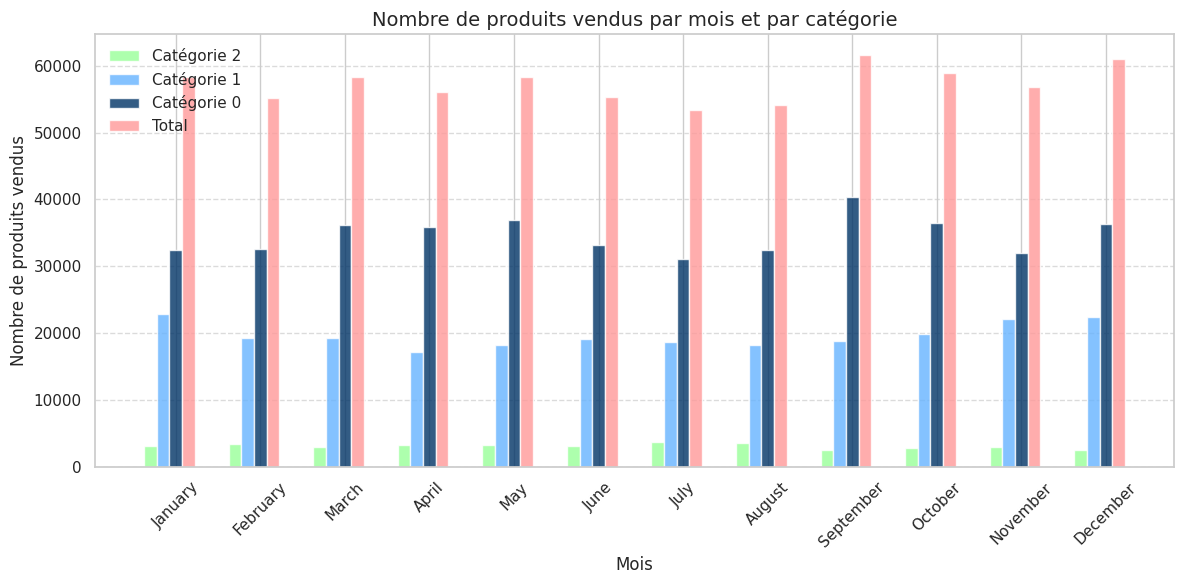

In [550]:
df_merge['month_name'] = df_merge['date'].dt.strftime('%B')
df_products_per_category_month = df_merge.groupby(['month_name', 'categ'])['id_prod'].count().reset_index()

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_products_per_category_month['month_name'] = pd.Categorical(df_products_per_category_month['month_name'], categories=month_order, ordered=True)
df_products_per_category_month = df_products_per_category_month.sort_values('month_name')

df_month_total = df_products_per_category_month.groupby('month_name')['id_prod'].sum().reset_index()
df_month_total['categ'] = 'Total'

df_products_per_category_month = pd.concat([df_products_per_category_month, df_month_total])

plt.figure(figsize=(12, 6))

categories = df_products_per_category_month['categ'].unique()

width = 0.15
x = range(len(month_order))

category_colors = {
    0: '#003366',
    1: '#66b3ff',
    2: '#99ff99',
    'Total': '#ff9999'
}

for i, category in enumerate(categories):
    category_data = df_products_per_category_month[df_products_per_category_month['categ'] == category]
    offset = width * (i - len(categories) // 2)

    color = category_colors.get(category, '#cccccc')
    plt.bar([month_order.index(month) + offset for month in category_data['month_name']],
            category_data['id_prod'], width=width,
            label=f'Catégorie {category}' if category != 'Total' else 'Total',
            color=color, alpha=0.8)

plt.xlabel('Mois', fontsize=12)
plt.ylabel('Nombre de produits vendus', fontsize=12)
plt.title('Nombre de produits vendus par mois et par catégorie', fontsize=14)

plt.legend()

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(x, month_order, rotation=45)
plt.tight_layout()
plt.show()




###### Distribution Hebdomadaire des ventes

<ipython-input-551-3be13b0a5e5d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sn.barplot(x='day_of_week',


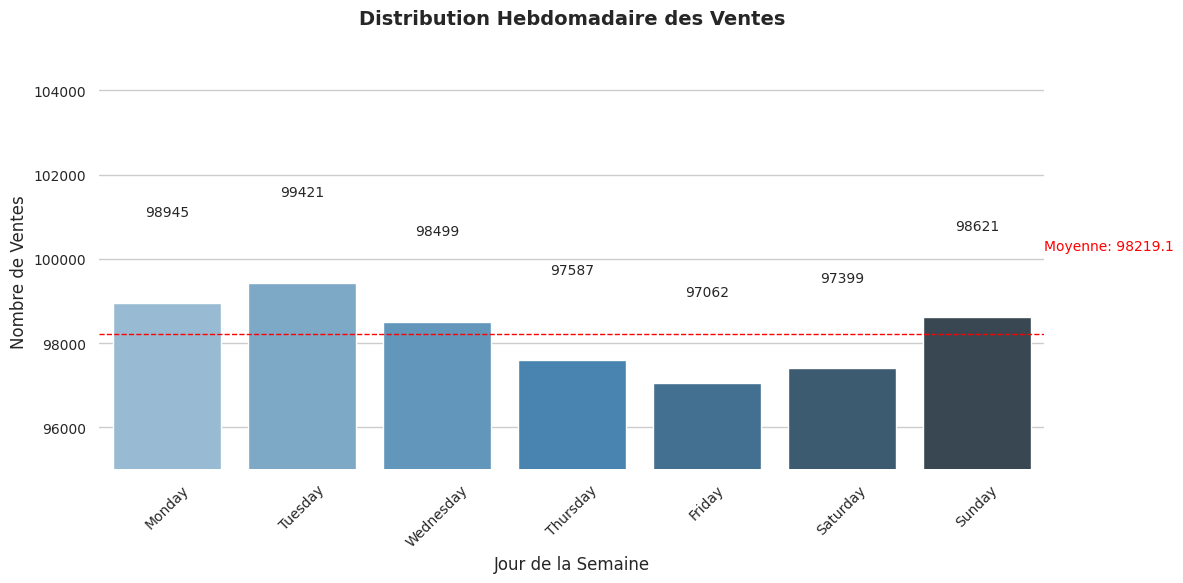

In [551]:
df_merge['day_of_week'] = df_merge['date'].dt.day_name()
df_sales_count_per_day = df_merge.groupby('day_of_week')['session_id'].count().reset_index()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_sales_count_per_day['day_of_week'] = pd.Categorical(df_sales_count_per_day['day_of_week'],
                                                       categories=days_order,
                                                       ordered=True)
df_sales_count_per_day = df_sales_count_per_day.sort_values('day_of_week')

plt.figure(figsize=(12, 6))
sn.set_theme(style="whitegrid")
palette = sn.color_palette("Blues_d", n_colors=7)

ax = sn.barplot(x='day_of_week',
                y='session_id',
                data=df_sales_count_per_day,
                palette=palette)

plt.title('Distribution Hebdomadaire des Ventes\n',
          fontsize=14,
          fontweight='bold',
          pad=20)
plt.xlabel('Jour de la Semaine', fontsize=12)
plt.ylabel('Nombre de Ventes', fontsize=12)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)

for p in ax.patches:
    height = p.get_height()
    y_min = plt.ylim()[0]
    y_offset = 0.02 * (df_sales_count_per_day['session_id'].max() - y_min)
    plt.text(p.get_x() + p.get_width()/2,
             height + y_offset,
             '{:1.0f}'.format(height),
             ha='center',
             va='bottom',
             fontsize=10)

mean_val = df_sales_count_per_day['session_id'].mean()
plt.axhline(mean_val,
            color='red',
            linestyle='--',
            linewidth=1)
plt.text(6.5,
         mean_val + max(df_sales_count_per_day['session_id'])*0.02,
         f'Moyenne: {mean_val:.1f}',
         color='red',
         fontsize=10)

plt.ylim(95000, df_sales_count_per_day['session_id'].max() * 1.05)  # Limite inférieure à 0

sn.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()




###### Répartition du nombre de vente en fonction des heures

<ipython-input-552-8979432e9b22>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sn.barplot(x='hour',


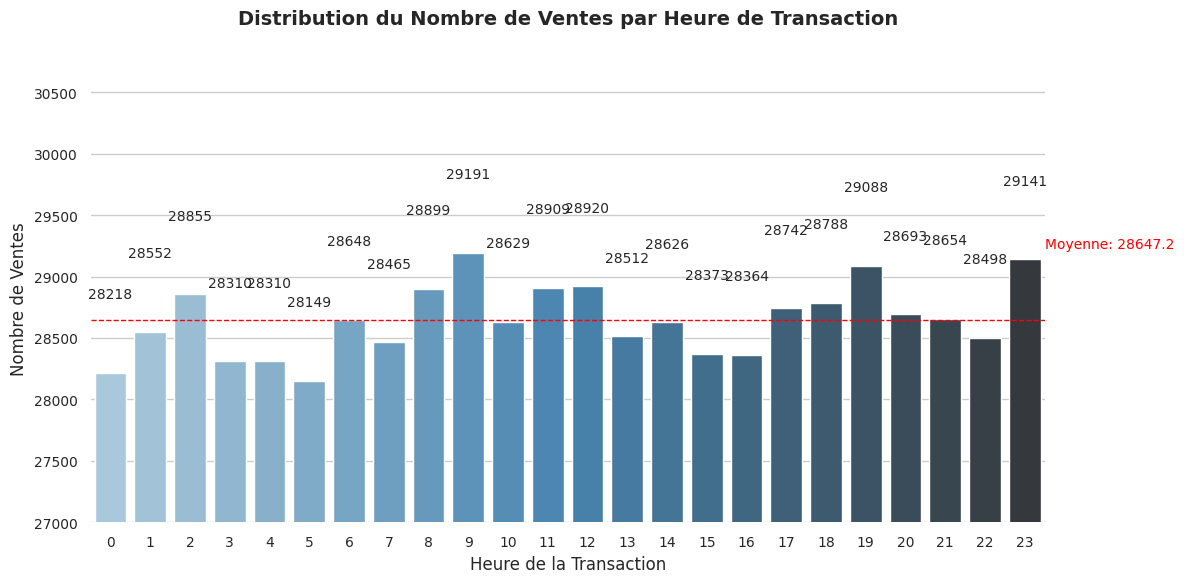

In [552]:
df_merge['hour'] = df_merge['date'].dt.hour
df_sales_per_hour = df_merge.groupby('hour')['session_id'].count().reset_index()

plt.figure(figsize=(12, 6))
sn.set_theme(style="whitegrid")
palette = sn.color_palette("Blues_d", n_colors=len(df_sales_per_hour))

ax = sn.barplot(x='hour',
                y='session_id',
                data=df_sales_per_hour,
                palette=palette)

plt.title('Distribution du Nombre de Ventes par Heure de Transaction\n',
          fontsize=14,
          fontweight='bold',
          pad=20)
plt.xlabel('Heure de la Transaction', fontsize=12)
plt.ylabel('Nombre de Ventes', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

for p in ax.patches:
    height = p.get_height()
    y_min = plt.ylim()[0]
    y_offset = 0.02 * (df_sales_per_hour['session_id'].max() - y_min)
    plt.text(p.get_x() + p.get_width()/2,
             height + y_offset,
             '{:1.0f}'.format(height),
             ha='center',
             va='bottom',
             fontsize=10)

mean_val = df_sales_per_hour['session_id'].mean()
plt.axhline(mean_val,
            color='red',
            linestyle='--',
            linewidth=1)
plt.text(23.5,
         mean_val + max(df_sales_per_hour['session_id'])*0.02,
         f'Moyenne: {mean_val:.1f}',
         color='red',
         fontsize=10)

plt.ylim(27000, df_sales_per_hour['session_id'].max() * 1.05)  # Ajuster la limite inférieure à 0

sn.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


### 4) Nombre de transaction

##### Evolution Globale des transactions

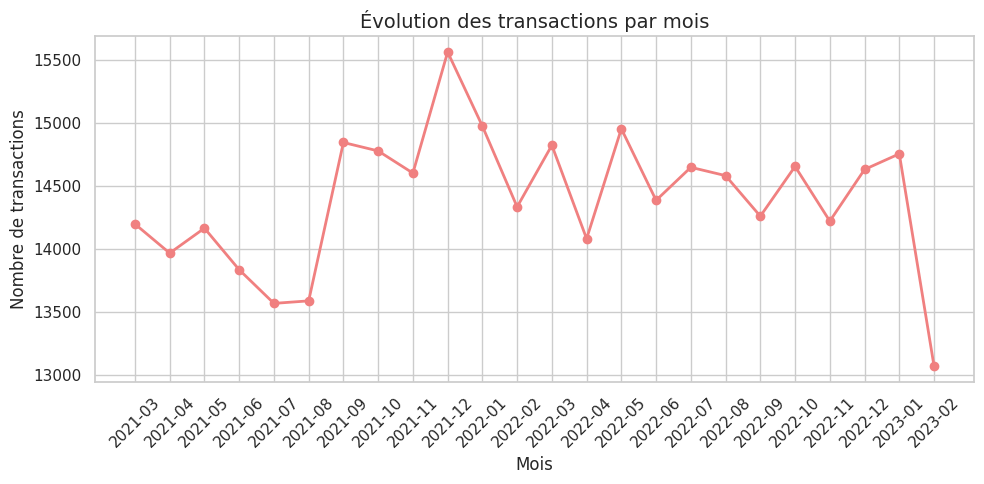

In [553]:
df_transactions_per_month = df_merge.groupby('year_month')['session_id'].nunique().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(
    df_transactions_per_month['year_month'].astype(str),
    df_transactions_per_month['session_id'],
    marker='o',
    color='lightcoral',
    linewidth=2
)

plt.xlabel('Mois', fontsize=12)
plt.ylabel('Nombre de transactions', fontsize=12)
plt.title('Évolution des transactions par mois', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

##### Nombre de transactions par catégorie

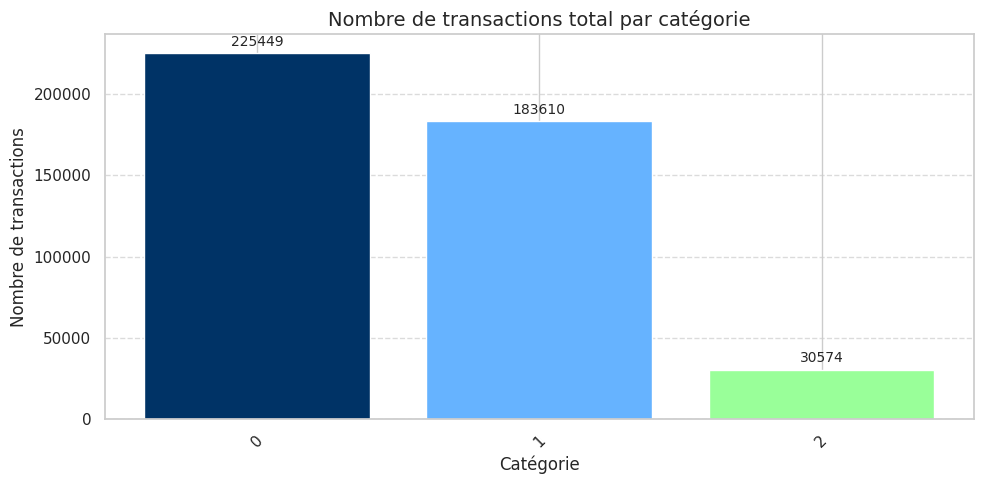

In [554]:
df_transactions_per_category = df_merge.groupby('categ')['session_id'].nunique().reset_index()

category_colors = {
    0: '#003366',
    1: '#66b3ff',
    2: '#99ff99'
}

plt.figure(figsize=(10, 5))

bars = plt.bar(
    df_transactions_per_category['categ'].astype(str),
    df_transactions_per_category['session_id'],
    color=[category_colors[cat] for cat in df_transactions_per_category['categ']]
)

for bar in bars:
    height = bar.get_height()
    plt.annotate(
        f'{height}',
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha='center', va='bottom',
        fontsize=10
    )

plt.xlabel('Catégorie', fontsize=12)
plt.ylabel('Nombre de transactions', fontsize=12)
plt.title('Nombre de transactions total par catégorie', fontsize=14)

plt.xticks(rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



In [555]:
df_transactions_per_day = df_merge.groupby('day_of_week')['session_id'].nunique().reset_index()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_transactions_per_day['day_of_week'] = pd.Categorical(df_transactions_per_day['day_of_week'],
                                                      categories=days_order,
                                                      ordered=True)
df_transactions_per_day = df_transactions_per_day.sort_values('day_of_week')
df_transactions_per_day.describe()

session_id
count      7.000000
mean   49584.571429
std      334.721206
min    49212.000000
25%    49346.500000
50%    49393.000000
75%    49893.500000
max    50007.000000

##### Saisonnalité hebdomadaire transactions

<ipython-input-556-b26c1693cf45>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sn.barplot(x='day_of_week',


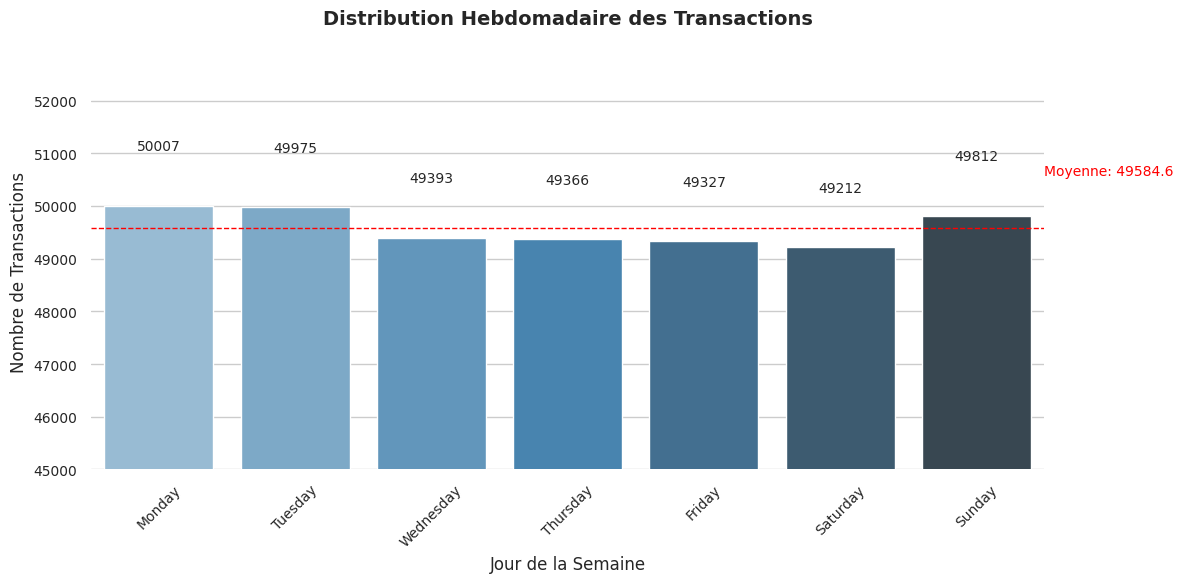

In [556]:
plt.figure(figsize=(12, 6))
sn.set_theme(style="whitegrid")
palette = sn.color_palette("Blues_d", n_colors=7)

ax = sn.barplot(x='day_of_week',
                y='session_id',
                data=df_transactions_per_day,
                palette=palette)

plt.title('Distribution Hebdomadaire des Transactions\n',
          fontsize=14,
          fontweight='bold',
          pad=20)
plt.xlabel('Jour de la Semaine', fontsize=12)
plt.ylabel('Nombre de Transactions', fontsize=12)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)

for p in ax.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width()/2,
             height + max(df_transactions_per_day['session_id'])*0.02,
             '{:1.0f}'.format(height),
             ha='center',
             va='bottom',
             fontsize=10)

mean_val = df_transactions_per_day['session_id'].mean()
plt.axhline(mean_val,
            color='red',
            linestyle='--',
            linewidth=1)
plt.text(6.5,
         mean_val + max(df_transactions_per_day['session_id'])*0.02,
         f'Moyenne: {mean_val:.1f}',
         color='red',
         fontsize=10)

plt.ylim(45000, df_transactions_per_day['session_id'].max() * 1.05)

sn.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


##### Distribution du nombre des transactions en fonction de l'horraire

In [557]:
df_merge['hour'] = df_merge['date'].dt.hour
df_transactions_per_hour = df_merge.groupby('hour')['session_id'].count().reset_index()  # Comptage des transactions par heure
df_transactions_per_hour.describe()

hour    session_id
count  24.000000     24.000000
mean   11.500000  28647.250000
std     7.071068    288.410373
min     0.000000  28149.000000
25%     5.750000  28442.000000
50%    11.500000  28638.500000
75%    17.250000  28866.000000
max    23.000000  29191.000000

<ipython-input-558-afef8b5d68a7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sn.barplot(x='hour',


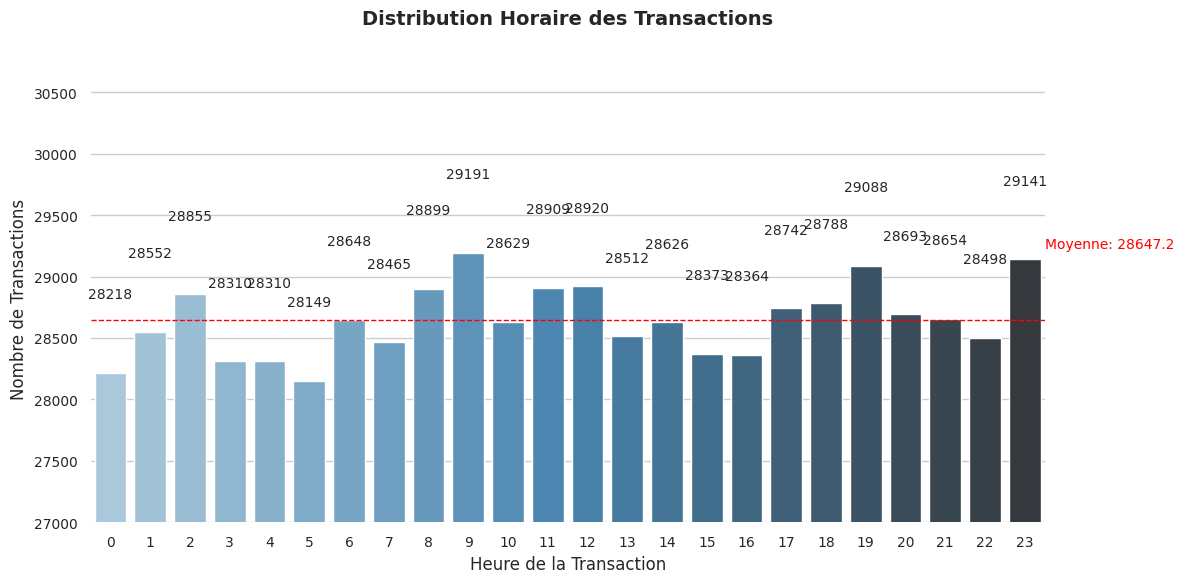

In [558]:
plt.figure(figsize=(12, 6))
sn.set_theme(style="whitegrid")
palette = sn.color_palette("Blues_d", n_colors=24)

ax = sn.barplot(x='hour',
                y='session_id',
                data=df_transactions_per_hour,
                palette=palette)

plt.title('Distribution Horaire des Transactions\n',
          fontsize=14,
          fontweight='bold',
          pad=20)
plt.xlabel('Heure de la Transaction', fontsize=12)
plt.ylabel('Nombre de Transactions', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

for p in ax.patches:
    height = p.get_height()
    y_min = plt.ylim()[0]
    y_offset = 0.02 * (df_transactions_per_hour['session_id'].max() - y_min)
    plt.text(p.get_x() + p.get_width()/2,
             height + y_offset,
             '{:1.0f}'.format(height),
             ha='center',
             va='bottom',
             fontsize=10)

mean_val = df_transactions_per_hour['session_id'].mean()
plt.axhline(mean_val,
            color='red',
            linestyle='--',
            linewidth=1)
plt.text(23.5,
         mean_val + max(df_transactions_per_hour['session_id'])*0.02,
         f'Moyenne: {mean_val:.1f}',
         color='red',
         fontsize=10)

plt.ylim(27000, df_transactions_per_hour['session_id'].max() * 1.05)  # Limite inférieure à 0

sn.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


##### Nombre de transactions cumulées dans le temps

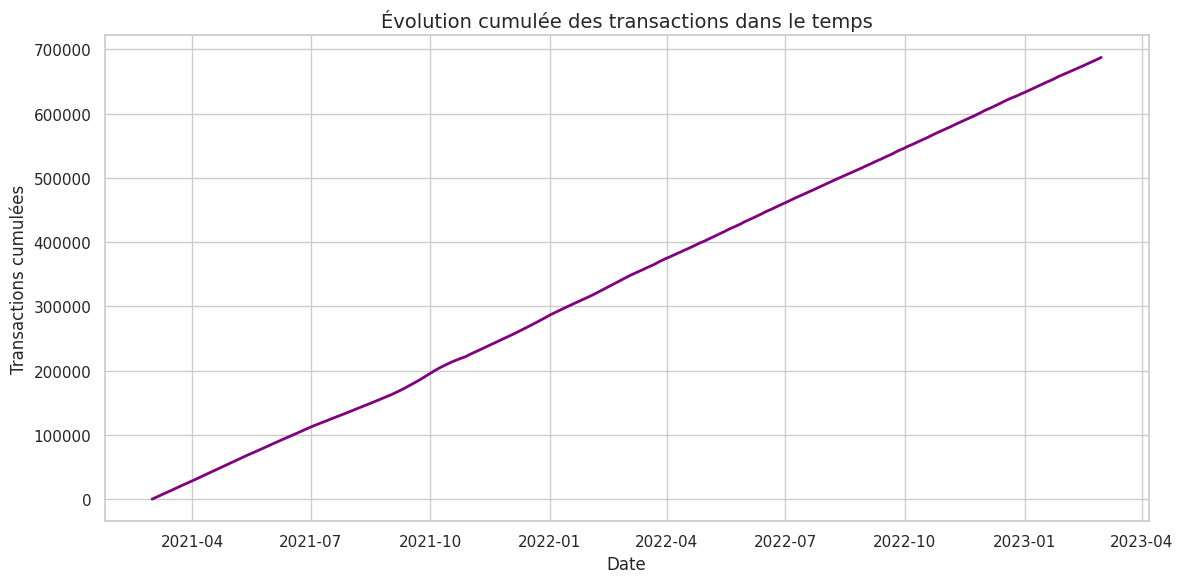

In [559]:
df_daily_transactions = df_merge.groupby('date')['session_id'].nunique().reset_index()
df_daily_transactions['cumulative_transactions'] = df_daily_transactions['session_id'].cumsum()

plt.figure(figsize=(12, 6))
plt.plot(df_daily_transactions['date'], df_daily_transactions['cumulative_transactions'], color='purple', linewidth=2)

plt.xlabel('Date', fontsize=12)
plt.ylabel('Transactions cumulées', fontsize=12)
plt.title('Évolution cumulée des transactions dans le temps', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


### 5) Analyse Top Flop *produit*

In [560]:
df_merge.head()

id_prod                       date session_id client_id sex      birth  age  \
0  0_1259 2021-03-01 00:01:07.843138        s_1     c_329   f 1967-01-01   58   
1  0_1390 2021-03-01 00:02:26.047414        s_2     c_664   m 1960-01-01   65   
2  0_1352 2021-03-01 00:02:38.311413        s_3     c_580   m 1988-01-01   37   
3  0_1458 2021-03-01 00:04:54.559692        s_4    c_7912   f 1989-01-01   36   
4  0_1358 2021-03-01 00:05:18.801198        s_5    c_2033   f 1956-01-01   69   

   price  categ  year day_of_week  hour year_month  month month_name  
0  11.99      0  2021      Monday     0    2021-03      3      March  
1  19.37      0  2021      Monday     0    2021-03      3      March  
2   4.50      0  2021      Monday     0    2021-03      3      March  
3   6.55      0  2021      Monday     0    2021-03      3      March  
4  16.49      0  2021      Monday     0    2021-03      3      March

##### Top 10 références par CA

In [561]:
agg_data = df_merge.groupby(['id_prod', 'categ','price']).agg(
    CA=('price', 'sum'),
    nb_ventes=('price', 'count')
).reset_index()

agg_data_sorted = agg_data.sort_values('CA', ascending=False)

top_10 = agg_data_sorted.head(10)
flop_10=agg_data_sorted.tail(10)

In [562]:
top_10[['id_prod','CA','categ','price','nb_ventes']]

id_prod        CA  categ   price  nb_ventes
3096   2_159  94893.50      2  145.99        650
3070   2_135  69334.95      2   68.99       1005
3045   2_112  65407.76      2   67.57        968
3034   2_102  60736.78      2   59.14       1027
3152   2_209  56971.86      2   69.99        814
2619   1_395  56617.47      1   28.99       1953
2591   1_369  56136.60      1   23.99       2340
3043   2_110  53846.25      2   62.25        865
2607   1_383  53834.43      1   28.99       1857
2641   1_414  53522.18      1   23.83       2246

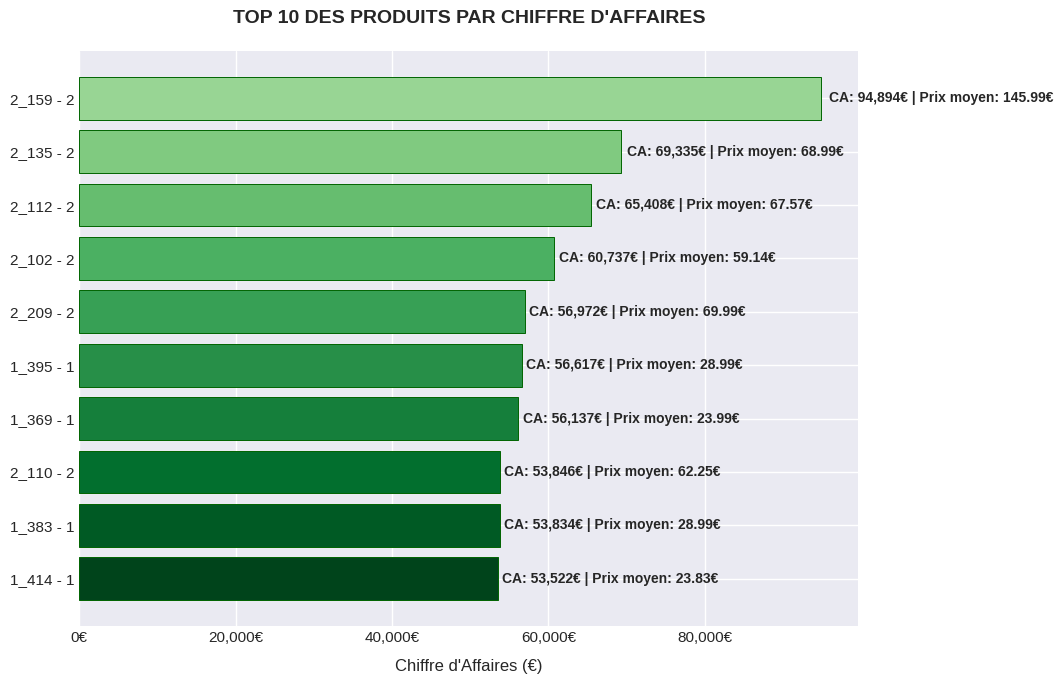

In [563]:
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(14, 7))

labels = [f"{str(row['id_prod'])} - {row['categ']}" for _, row in top_10.iterrows()]
ca_values = top_10['CA']
prix_moyens = top_10['price']

colors = plt.cm.Greens(np.linspace(0.4, 1, len(top_10)))

bars = ax.barh(
    labels,
    ca_values,
    color=colors,
    edgecolor='darkgreen',
    linewidth=0.7
)

for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width * 1.01,
            bar.get_y() + bar.get_height()/2,
            f'CA: {width:,.0f}€ | Prix moyen: {prix_moyens.iloc[i]:,.2f}€',
            va='center',
            fontsize=10,
            fontweight='bold')

ax.set_title('TOP 10 DES PRODUITS PAR CHIFFRE D\'AFFAIRES',
            pad=20,
            fontsize=14,
            fontweight='bold')
ax.set_xlabel('Chiffre d\'Affaires (€)',
             labelpad=10,
             fontsize=12)

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

ax.xaxis.set_major_formatter('{x:,.0f}€')

plt.tight_layout()
plt.gca().invert_yaxis()
plt.subplots_adjust(left=0.3)

plt.show()

##### Flop 10 par CA

In [564]:
flop_10[['id_prod','CA','categ','price','nb_ventes']]

id_prod    CA  categ  price  nb_ventes
925   0_1840  2.56      0   1.28          2
2179   0_898  2.54      0   1.27          2
549   0_1498  2.48      0   2.48          1
802   0_1728  2.27      0   2.27          1
1784   0_541  1.99      0   1.99          1
665   0_1601  1.99      0   1.99          1
2079   0_807  1.99      0   1.99          1
719   0_1653  1.98      0   0.99          2
313   0_1284  1.38      0   1.38          1
595   0_1539  0.99      0   0.99          1

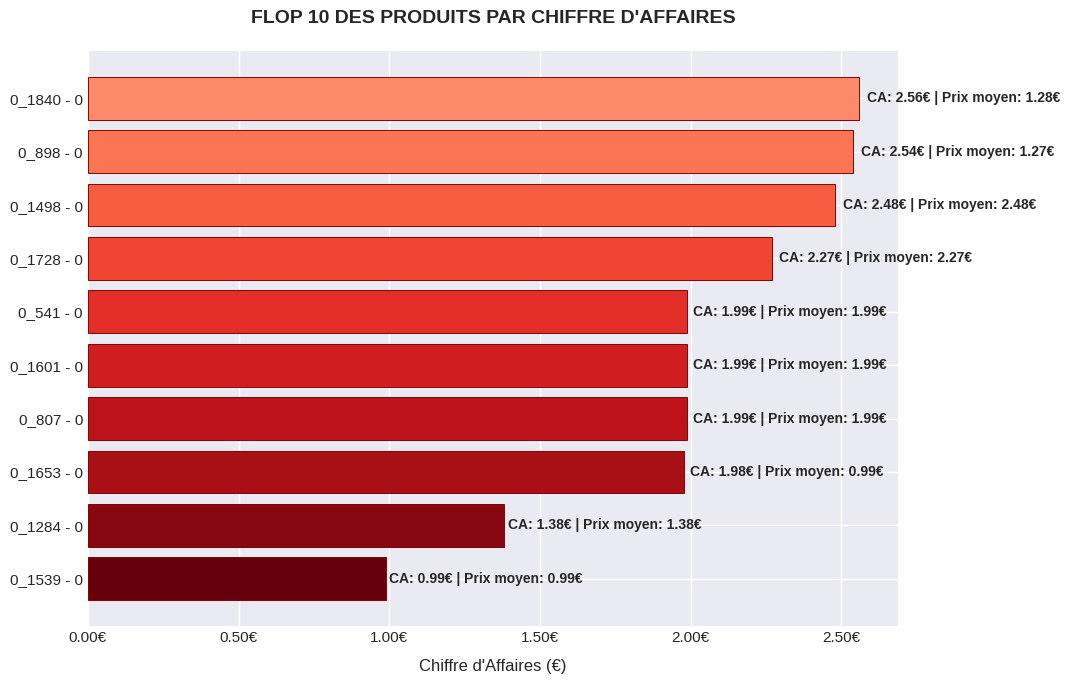

In [565]:
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(14, 7))

labels = [f"{str(row['id_prod'])} - {row['categ']}" for _, row in flop_10.iterrows()]
ca_values = flop_10['CA']
prix_moyens = flop_10['price']

colors = plt.cm.Reds(np.linspace(0.4, 1, len(top_10)))

bars = ax.barh(
    labels,
    ca_values,
    color=colors,
    edgecolor='darkred',
    linewidth=0.7
)

for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width * 1.01,
            bar.get_y() + bar.get_height()/2,
            f'CA: {width:,.2f}€ | Prix moyen: {prix_moyens.iloc[i]:,.2f}€',
            va='center',
            fontsize=10,
            fontweight='bold')

ax.set_title('FLOP 10 DES PRODUITS PAR CHIFFRE D\'AFFAIRES',
            pad=20,
            fontsize=14,
            fontweight='bold')
ax.set_xlabel('Chiffre d\'Affaires (€)',
             labelpad=10,
             fontsize=12)

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

ax.xaxis.set_major_formatter('{x:,.2f}€')

plt.tight_layout()
plt.gca().invert_yaxis()
plt.subplots_adjust(left=0.3)

plt.show()

##### Top 10 références par vente

In [566]:
vente_data_sorted = agg_data.sort_values(by='nb_ventes', ascending=False)
top_10_ventes = vente_data_sorted.head(10)
flop_10_ventes = vente_data_sorted.tail(20)

top_10_ventes


id_prod  categ  price        CA  nb_ventes
2591   1_369      1  23.99  56136.60       2340
2644   1_417      1  20.99  47626.31       2269
2641   1_414      1  23.83  53522.18       2246
2733   1_498      1  23.37  51460.74       2202
2653   1_425      1  16.99  36749.37       2163
2629   1_403      1  17.99  36699.60       2040
2640   1_413      1  17.99  36627.64       2036
2639   1_412      1  16.65  33533.10       2014
2632   1_406      1  24.81  49694.43       2003
2633   1_407      1  15.99  31995.99       2001

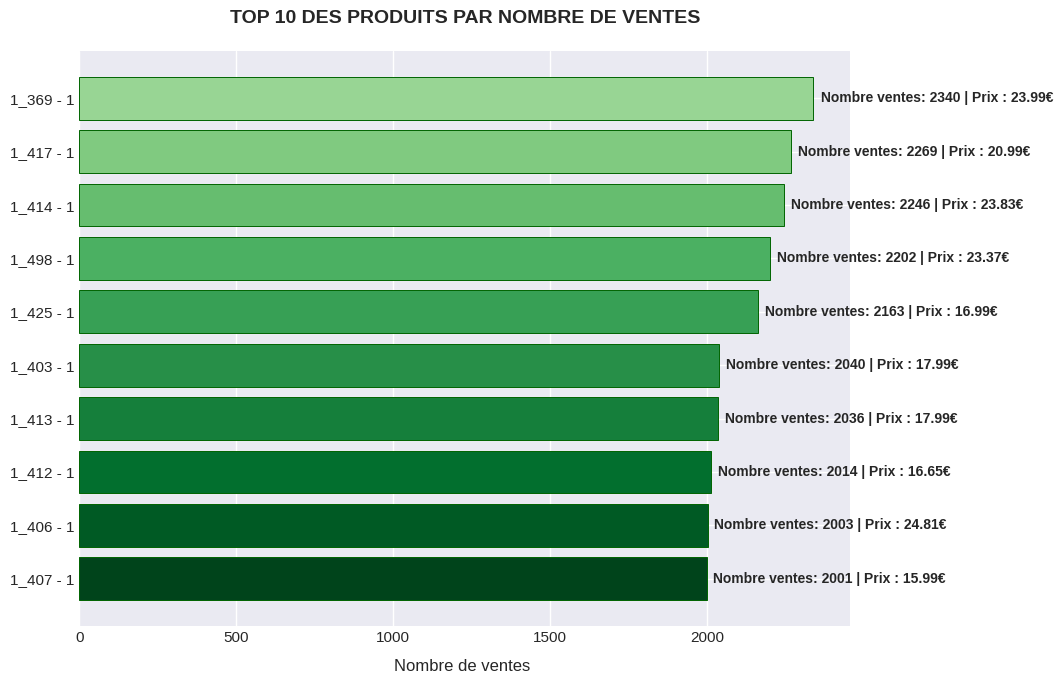

In [567]:
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(14, 7))

labels = [f"{str(row['id_prod'])} - {row['categ']}" for _, row in top_10_ventes.iterrows()]
ventes_values = top_10_ventes['nb_ventes']
prix = top_10_ventes['price']

colors = plt.cm.Greens(np.linspace(0.4, 1, len(top_10)))

bars = ax.barh(
    labels,
    ventes_values,
    color=colors,
    edgecolor='darkgreen',
    linewidth=0.7
)

for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width * 1.01,
            bar.get_y() + bar.get_height()/2,
            f'Nombre ventes: {width} | Prix : {prix.iloc[i]:,.2f}€',
            va='center',
            fontsize=10,
            fontweight='bold')

ax.set_title('TOP 10 DES PRODUITS PAR NOMBRE DE VENTES',
            pad=20,
            fontsize=14,
            fontweight='bold')
ax.set_xlabel('Nombre de ventes ',
             labelpad=10,
             fontsize=12)

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

plt.tight_layout()
plt.gca().invert_yaxis()
plt.subplots_adjust(left=0.3)

plt.show()


##### Flop 10 références par vente

In [568]:
flop_10_ventes

id_prod  categ   price      CA  nb_ventes
2752   1_514      1   67.66  135.32          2
2159    0_88      0    8.30   16.60          2
595   0_1539      0    0.99    0.99          1
3263    2_98      2  149.74  149.74          1
698   0_1633      0   24.99   24.99          1
2079   0_807      0    1.99    1.99          1
1327  0_2201      0   20.99   20.99          1
665   0_1601      0    1.99    1.99          1
549   0_1498      0    2.48    2.48          1
417   0_1379      0    2.99    2.99          1
2108   0_833      0    2.99    2.99          1
752   0_1683      0    2.99    2.99          1
1792   0_549      0    2.99    2.99          1
2166   0_886      0   21.82   21.82          1
802   0_1728      0    2.27    2.27          1
166   0_1151      0    2.99    2.99          1
313   0_1284      0    1.38    1.38          1
1784   0_541      0    1.99    1.99          1
3175    2_23      2  115.99  115.99          1
3247    2_81      2   86.99   86.99          1

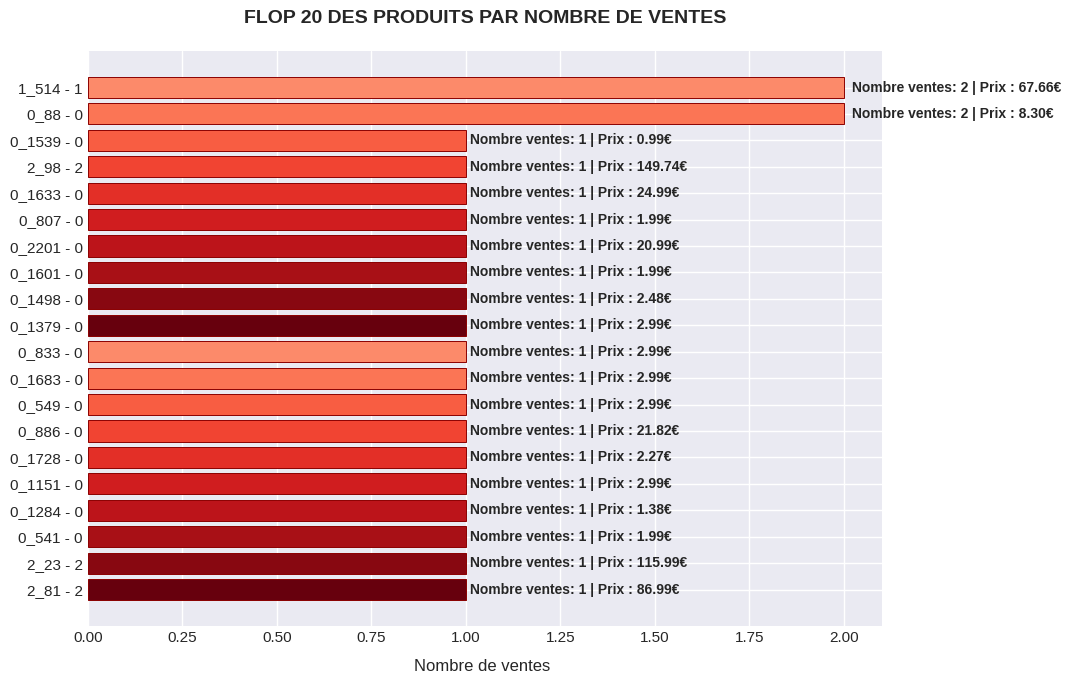

In [569]:
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(14, 7))

labels = [f"{str(row['id_prod'])} - {row['categ']}" for _, row in flop_10_ventes.iterrows()]
ventes_values = flop_10_ventes['nb_ventes']
prix = flop_10_ventes['price']

colors = plt.cm.Reds(np.linspace(0.4, 1, len(top_10)))

bars = ax.barh(
    labels,
    ventes_values,
    color=colors,
    edgecolor='darkred',
    linewidth=0.7
)

for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width * 1.01,
            bar.get_y() + bar.get_height()/2,
            f'Nombre ventes: {width} | Prix : {prix.iloc[i]:,.2f}€',
            va='center',
            fontsize=10,
            fontweight='bold')

ax.set_title('FLOP 20 DES PRODUITS PAR NOMBRE DE VENTES',
            pad=20,
            fontsize=14,
            fontweight='bold')
ax.set_xlabel('Nombre de ventes ',
             labelpad=10,
             fontsize=12)

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)


plt.tight_layout()
plt.gca().invert_yaxis()
plt.subplots_adjust(left=0.3)

plt.show()

##### Courbe de Lorentz CA produit

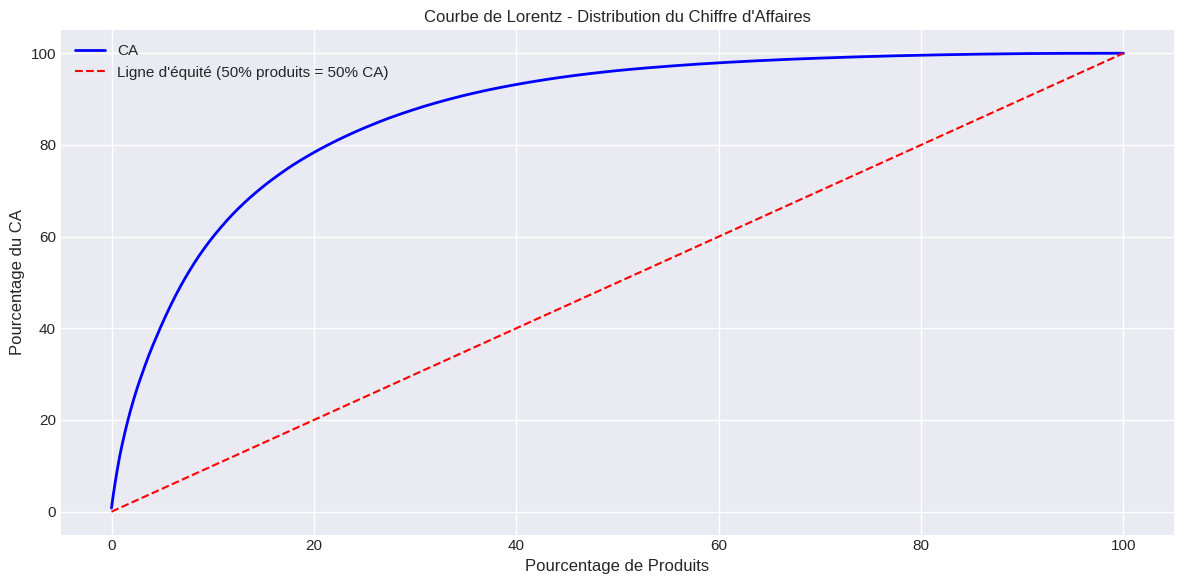

80% du CA est atteint à partir de 21.42% des produits.


In [570]:
def lorentz_curve(data, value_col):
    data_sorted = data.sort_values(by=value_col, ascending=False)

    total_value = data_sorted[value_col].sum()
    cumulative_value = data_sorted[value_col].cumsum()
    cumulative_percentage_value = cumulative_value / total_value * 100

    num_products = data_sorted.shape[0]
    cumulative_percentage_products = np.linspace(0, 100, num_products)

    return cumulative_percentage_products, cumulative_percentage_value

x_CA, y_CA = lorentz_curve(agg_data, 'CA')

x_sales, y_sales = lorentz_curve(agg_data, 'nb_ventes')

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x_CA, y_CA, label="CA", color='blue', lw=2)
ax.plot([0, 100], [0, 100], '--', color='red', label="Ligne d'équité (50% produits = 50% CA)")
ax.set_xlabel('Pourcentage de Produits')
ax.set_ylabel('Pourcentage du CA')
ax.set_title('Courbe de Lorentz - Distribution du Chiffre d\'Affaires')
ax.legend()
plt.tight_layout()
plt.show()

threshold_CA = np.argmax(y_CA >= 80)
print(f"80% du CA est atteint à partir de {round(x_CA[threshold_CA],2)}% des produits.")

##### Courbe de Lorentz Vente Produit

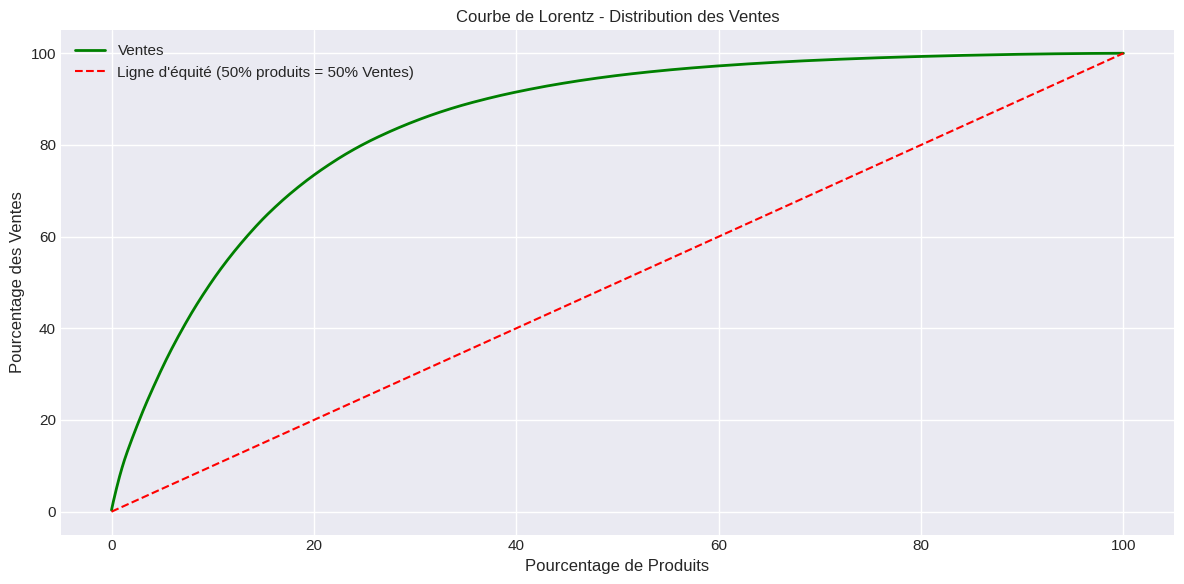

80% des ventes sont atteintes à partir de 24.79% des produits.


In [571]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x_sales, y_sales, label="Ventes", color='green', lw=2)
ax.plot([0, 100], [0, 100], '--', color='red', label="Ligne d'équité (50% produits = 50% Ventes)")
ax.set_xlabel('Pourcentage de Produits')
ax.set_ylabel('Pourcentage des Ventes')
ax.set_title('Courbe de Lorentz - Distribution des Ventes')
ax.legend()
plt.tight_layout()
plt.show()

threshold_sales = np.argmax(y_sales >= 80)
print(f"80% des ventes sont atteintes à partir de {round(x_sales[threshold_sales],2)}% des produits.")

##### Quel est la répartition des catégories des tops produits permettant d'atteindre 80% du CA?

In [572]:
df_CA_cat = df_merge.groupby(["id_prod", "categ"])["price"].sum().reset_index(name="CA")

df_CA_cat = df_CA_cat.sort_values(by='CA', ascending=False).reset_index(drop=True)

df_CA_cat["CA_cum"] = df_CA_cat["CA"].cumsum()
df_CA_cat["CA_cumule_pct"] = df_CA_cat["CA_cum"] / df_CA_cat["CA"].sum()

top_articles_80_CA = df_CA_cat[df_CA_cat["CA_cumule_pct"] <= 0.8]

ca_par_cat = top_articles_80_CA.groupby("categ")["CA"].sum()
total_CA_top80 = top_articles_80_CA["CA"].sum()
top_cat_80_CA_count = top_articles_80_CA["categ"].value_counts()
top_cat_80_CA_percent = top_articles_80_CA["categ"].value_counts(normalize=True)
CA_cat_percent = (ca_par_cat / total_CA_top80 * 100).round(2)

df_top_cat_CA = pd.DataFrame({
    "Nombre d'articles": top_cat_80_CA_count,
    "Proportion d'articles (%)": (top_cat_80_CA_percent * 100).round(2),
    "Part du CA cumulé (%)": CA_cat_percent
})

df_top_cat_CA


Nombre d'articles  Proportion d'articles (%)  Part du CA cumulé (%)
categ                                                                     
0                    318                      45.49                  29.59
1                    258                      36.91                  43.49
2                    123                      17.60                  26.92

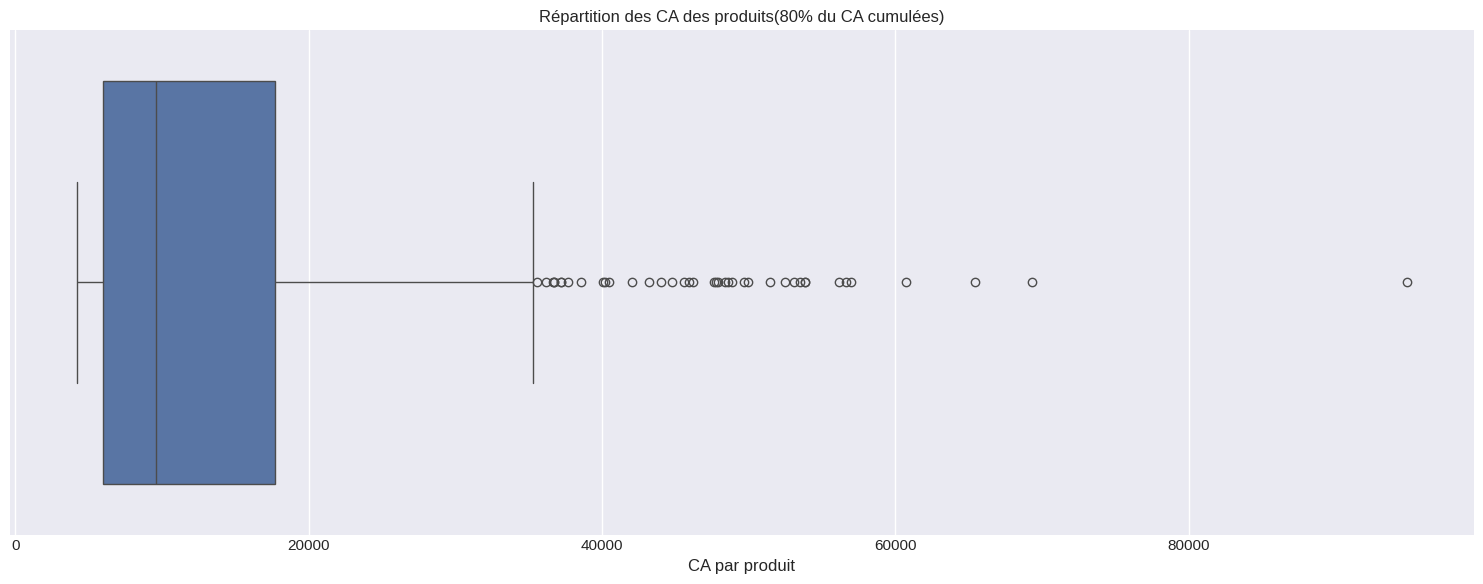

In [573]:
plt.figure(figsize=(15,6))
sn.boxplot(x=top_articles_80_CA["CA"])


plt.title('Répartition des CA des produits(80% du CA cumulées)')
plt.xlabel("CA par produit")
plt.tight_layout()
plt.show()


In [574]:
top_articles_80_CA["CA"].describe()

count      699.000000
mean     13765.264921
std      11382.544527
min       4176.900000
25%       5958.575000
50%       9572.160000
75%      17694.325000
max      94893.500000
Name: CA, dtype: float64

##### Caractéristiques prix top produit permettant d'atteindre 80% du CA

In [575]:
df_CA_80=df_merge.groupby("id_prod").agg(
    CA=("price","sum"),
    price=("price","mean")
)
df_CA_80.sort_values(by="price", ascending=False)
df_CA_80["CA_cum"]=df_CA_80["price"].cumsum()
df_CA_80["CA_cum_percent"]=df_CA_80["CA_cum"]/df_CA_80["CA"]
df_CA_80=df_CA_80[df_CA_80["CA_cum_percent"]<=0.8]
df_CA_80["price"].describe()




count    303.000000
mean      14.423531
std       10.508972
min        3.690000
25%        9.725000
50%       13.210000
75%       17.275000
max      145.990000
Name: price, dtype: float64

##### Répartition par catégorie Top produit qui permet d'atteindre 80% des ventes

In [576]:
df_80_ventes_by_cat = df_merge.groupby(["id_prod", "categ"]).agg(
    nb_ventes=("id_prod", "count")
)

df_80_ventes_by_cat = df_80_ventes_by_cat.sort_values(by="nb_ventes", ascending=False).reset_index()

total_ventes = df_80_ventes_by_cat["nb_ventes"].sum()
df_80_ventes_by_cat["vente_cum"] = df_80_ventes_by_cat["nb_ventes"].cumsum()
df_80_ventes_by_cat["vente_cum_pct"] = df_80_ventes_by_cat["vente_cum"] / total_ventes

df_80_ventes_by_cat = df_80_ventes_by_cat[df_80_ventes_by_cat["vente_cum_pct"] < 0.8]

nb_articles_par_cat = df_80_ventes_by_cat["categ"].value_counts()

prop_articles_par_cat = df_80_ventes_by_cat["categ"].value_counts(normalize=True) * 100

df_top_cat_ventes = pd.DataFrame({
    "Nombre d'articles": nb_articles_par_cat,
    "Proportion d'articles (%)": prop_articles_par_cat
})
df_top_cat_ventes



Nombre d'articles  Proportion d'articles (%)
categ                                              
0                    524                  64.771323
1                    236                  29.171817
2                     49                   6.056860

##### Boite à Moustache répartition du TOP qui a généré 80% des ventes

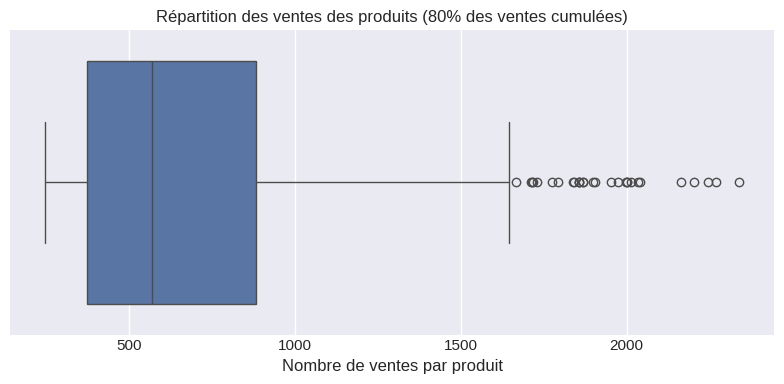

In [577]:
plt.figure(figsize=(8, 4))
sn.boxplot(x=df_80_ventes_by_cat["nb_ventes"])

plt.title("Répartition des ventes des produits (80% des ventes cumulées)")
plt.xlabel("Nombre de ventes par produit")
plt.tight_layout()
plt.show()

##### Caractéristiques du prix moyen des articles permettant d'attendre 80% des ventes

In [578]:
df_ventes = df_merge.groupby('id_prod').agg(
    nb_ventes=('id_prod', 'count'),
    price=('price', 'mean')
).reset_index()

df_ventes = df_ventes.sort_values('nb_ventes', ascending=False)

df_ventes['ventes_cum'] = df_ventes['nb_ventes'].cumsum()
total_ventes = df_ventes['nb_ventes'].sum()
df_ventes['pct_cumule'] = 100 * df_ventes['ventes_cum'] / total_ventes

df_80_ventes = df_ventes[df_ventes['pct_cumule'] <= 80]

df_80_ventes['price'].describe()

count    809.000000
mean      16.256044
std       13.524498
min        2.990000
25%        8.310000
50%       12.990000
75%       18.990000
max      145.990000
Name: price, dtype: float64

#### **MOST IMPORTANT PRODUCTS** (Produits appartenant dans le TOP génération 80% CA et Ventes)

In [579]:
df_CA_80.head()

CA  price  CA_cum  CA_cum_percent
id_prod                                        
0_0      4657.50   3.75    3.75        0.000805
0_1      5352.13  10.99   14.74        0.002754
0_10      394.90  17.95   32.69        0.082780
0_1000   2954.88   6.84   60.13        0.020349
0_1001   2020.95   4.99   65.12        0.032222

In [580]:
df_most_important_products = df_80_ventes.merge(df_CA_80, how='inner', on='id_prod', suffixes=('_left', '_right'))
df_cat=df_merge[["id_prod","categ"]].drop_duplicates()
df_most_important_products.describe()

nb_ventes  price_left     ventes_cum  pct_cumule            CA  \
count   299.000000  299.000000     299.000000  299.000000    299.000000   
mean    724.719064   14.357860  339282.491639   49.347740  11296.148227   
std     397.893060   10.548551  147077.980849   21.392103  12308.486329   
min     247.000000    3.690000    2340.000000    0.340347   1296.180000   
25%     417.000000    9.680000  213540.000000   31.058828   4569.810000   
50%     562.000000   13.160000  396590.000000   57.682965   7876.060000   
75%     980.500000   17.075000  465436.500000   67.696507  13056.910000   
max    2340.000000  145.990000  548963.000000   79.845215  94893.500000   

       price_right        CA_cum  CA_cum_percent  
count   299.000000    299.000000      299.000000  
mean     14.357860   5480.313612        0.422463  
std      10.548551   8636.825610        0.222412  
min       3.690000      3.750000        0.000805  
25%       9.680000   1312.195000        0.242136  
50%      13.160000   3837.750000        0.417714  
75%      17.075000   5713.275000        0.618852  
max     145.990000  52916.120000        0.797096

In [581]:
df_most_important_products=df_most_important_products.merge(df_cat,how="inner", on="id_prod")

In [582]:
df_most_important_products.describe()

nb_ventes  price_left     ventes_cum  pct_cumule            CA  \
count   299.000000  299.000000     299.000000  299.000000    299.000000   
mean    724.719064   14.357860  339282.491639   49.347740  11296.148227   
std     397.893060   10.548551  147077.980849   21.392103  12308.486329   
min     247.000000    3.690000    2340.000000    0.340347   1296.180000   
25%     417.000000    9.680000  213540.000000   31.058828   4569.810000   
50%     562.000000   13.160000  396590.000000   57.682965   7876.060000   
75%     980.500000   17.075000  465436.500000   67.696507  13056.910000   
max    2340.000000  145.990000  548963.000000   79.845215  94893.500000   

       price_right        CA_cum  CA_cum_percent       categ  
count   299.000000    299.000000      299.000000  299.000000  
mean     14.357860   5480.313612        0.422463    0.070234  
std      10.548551   8636.825610        0.222412    0.303918  
min       3.690000      3.750000        0.000805    0.000000  
25%       9.680000   1312.195000        0.242136    0.000000  
50%      13.160000   3837.750000        0.417714    0.000000  
75%      17.075000   5713.275000        0.618852    0.000000  
max     145.990000  52916.120000        0.797096    2.000000

In [583]:
df_most_important_products.drop(columns=['price_left'], inplace=True)
df_most_important_products.rename(columns={'price_right': 'price'}, inplace=True)

In [584]:
df_most_important_products.head()

id_prod  nb_ventes  ventes_cum  pct_cumule        CA  price    CA_cum  \
0   1_369       2340        2340    0.340347  56136.60  23.99  34833.53   
1   1_417       2269        4609    0.670367  47626.31  20.99  36163.14   
2   1_414       2246        6855    0.997042  53522.18  23.83  36017.54   
3   1_498       2202        9057    1.317317  51460.74  23.37  38426.05   
4   1_406       2003       19313    2.809025  49694.43  24.81  35760.00   

   CA_cum_percent  categ  
0        0.620514      1  
1        0.759310      1  
2        0.672946      1  
3        0.746706      1  
4        0.719598      1

In [585]:
CA_total = df_most_important_products["CA"].sum()
VENTES_total = df_most_important_products["nb_ventes"].sum()

CA_total_librairie = df_ca["ca_total"].sum()
VENTES_total_librairie = df_ventes["nb_ventes"].sum()

pourcentage_CA = round((CA_total / CA_total_librairie) * 100, 2)
pourcentage_ventes = round((VENTES_total / VENTES_total_librairie) * 100, 2)
total_best_products=df_most_important_products["id_prod"].count()
total_products=len(df_merge["id_prod"].unique())
print(f"Les produits les plus importants génèrent {CA_total} € de chiffre d'affaires, soit {pourcentage_CA}% du total.")
print(f"Ils représentent aussi {VENTES_total} ventes, soit {pourcentage_ventes}% du total des ventes.")
print(f'Ces produits sont au nombre de {total_best_products}/{total_products} soit {round((total_best_products/total_products)*100,2)}%. ')

Les produits les plus importants génèrent 3377548.32 € de chiffre d'affaires, soit 28.08% du total.
Ils représentent aussi 216691 ventes, soit 31.52% du total des ventes.
Ces produits sont au nombre de 299/3265 soit 9.16%. 


In [586]:
df_cat_article_count = df_most_important_products["categ"].value_counts().reset_index(name="nb_articles")
df_cat_article_count.columns = ["categ", "nb_articles"]
df_cat_article_count

categ  nb_articles
0      0          282
1      1           13
2      2            4

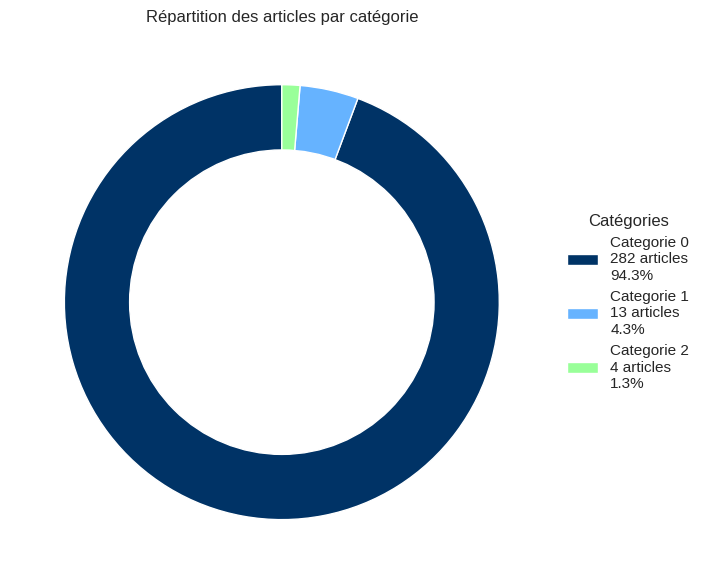

In [587]:
df_cat_article_count["pct"] = (df_cat_article_count["nb_articles"] / df_cat_article_count["nb_articles"].sum() * 100).round(1)

category_colors = {
    0: '#003366',
    1: '#66b3ff',
    2: '#99ff99'
}

labels = [
    f"Categorie {row.categ}\n{row.nb_articles} articles\n{row.pct}%"
    for row in df_cat_article_count.itertuples()
]

colors = [category_colors[c] for c in df_cat_article_count["categ"]]
sizes = df_cat_article_count["nb_articles"]

fig, ax = plt.subplots(figsize=(8, 6))
wedges, _ = ax.pie(sizes, colors=colors, startangle=90, wedgeprops=dict(width=0.4))

plt.legend(wedges, labels, title="Catégories", loc="center left", bbox_to_anchor=(1, 0.5))

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
ax.add_artist(centre_circle)

ax.set_title("Répartition des articles par catégorie")
plt.tight_layout()
plt.show()


In [588]:
df_most_important_products["price"].describe()

count    299.000000
mean      14.357860
std       10.548551
min        3.690000
25%        9.680000
50%       13.160000
75%       17.075000
max      145.990000
Name: price, dtype: float64

In [589]:
df_most_important_products["nb_ventes"].describe()

count     299.000000
mean      724.719064
std       397.893060
min       247.000000
25%       417.000000
50%       562.000000
75%       980.500000
max      2340.000000
Name: nb_ventes, dtype: float64

In [590]:
df_most_important_products["CA"].describe()

count      299.000000
mean     11296.148227
std      12308.486329
min       1296.180000
25%       4569.810000
50%       7876.060000
75%      13056.910000
max      94893.500000
Name: CA, dtype: float64

In [591]:
df_most_important_products["id_prod"].tolist()

['1_369',
 '1_417',
 '1_414',
 '1_498',
 '1_406',
 '1_395',
 '1_385',
 '1_383',
 '1_389',
 '1_378',
 '1_379',
 '1_431',
 '1_366',
 '0_1422',
 '0_1431',
 '0_1425',
 '0_1432',
 '0_1411',
 '0_0',
 '0_1424',
 '0_1441',
 '0_1434',
 '0_1430',
 '0_1445',
 '0_1416',
 '0_1438',
 '0_1419',
 '0_1417',
 '0_1410',
 '0_1476',
 '0_1446',
 '0_1474',
 '0_1429',
 '0_1435',
 '0_1420',
 '0_1473',
 '0_1471',
 '0_1426',
 '0_1421',
 '0_1414',
 '0_1412',
 '0_1475',
 '0_1479',
 '0_1358',
 '0_1457',
 '0_1448',
 '0_1407',
 '0_1451',
 '0_1366',
 '0_1464',
 '0_1472',
 '0_1453',
 '0_1461',
 '0_1357',
 '0_1418',
 '0_1350',
 '0_1404',
 '0_1470',
 '0_1362',
 '0_1335',
 '0_1455',
 '2_102',
 '0_1469',
 '0_1396',
 '0_1450',
 '0_1452',
 '0_1355',
 '0_1330',
 '0_1349',
 '2_135',
 '0_1338',
 '0_1354',
 '0_1351',
 '0_1401',
 '0_1342',
 '0_1347',
 '0_1325',
 '0_1353',
 '2_112',
 '0_1333',
 '0_1363',
 '0_1334',
 '0_1340',
 '0_1345',
 '0_1344',
 '0_1348',
 '0_1397',
 '0_1393',
 '0_1378',
 '0_1399',
 '0_1328',
 '0_1403',
 '0_138

### 6) Analyse par profil client(BtoB & Particulier)

In [592]:
df_merge.head()

id_prod                       date session_id client_id sex      birth  age  \
0  0_1259 2021-03-01 00:01:07.843138        s_1     c_329   f 1967-01-01   58   
1  0_1390 2021-03-01 00:02:26.047414        s_2     c_664   m 1960-01-01   65   
2  0_1352 2021-03-01 00:02:38.311413        s_3     c_580   m 1988-01-01   37   
3  0_1458 2021-03-01 00:04:54.559692        s_4    c_7912   f 1989-01-01   36   
4  0_1358 2021-03-01 00:05:18.801198        s_5    c_2033   f 1956-01-01   69   

   price  categ  year day_of_week  hour year_month  month month_name  
0  11.99      0  2021      Monday     0    2021-03      3      March  
1  19.37      0  2021      Monday     0    2021-03      3      March  
2   4.50      0  2021      Monday     0    2021-03      3      March  
3   6.55      0  2021      Monday     0    2021-03      3      March  
4  16.49      0  2021      Monday     0    2021-03      3      March

Les clients BtoB désignent des entreprises qui achètent des produits pour les besoins de leur activité professionnelle. Ces clients ont généralement un volume et une fréquence d’achat plus élevés que les clients particuliers.

Dans le cadre de cette analyse, nous faisons l’hypothèse que la majorité des clients de notre librairie sont des clients retail (particuliers).

Par conséquent, nous considérons que les valeurs extrêmes en termes de fréquence et de volume d’achat correspondent probablement à des clients BtoB.

In [593]:
clients = df_merge.groupby("client_id").agg(
    CA=('price', 'sum'),
    nb_vente=('client_id', 'count')
).reset_index()

Q1_vente=clients["nb_vente"].quantile(0.25)
Q3_vente=clients["nb_vente"].quantile(0.75)
IQR_vente=Q3_vente-Q1_vente


Q1_CA=clients["CA"].quantile(0.25)
Q3_CA=clients["CA"].quantile(0.75)
IQR_CA=Q3_CA-Q1_CA
outliers=clients[(clients["CA"] > Q3_CA + 1.5 * IQR_CA) &
    (clients["nb_vente"] > Q3_vente + 1.5 * IQR_vente)]

clients["type"] = "Retail"
clients.loc[
    (clients["CA"] > Q3_CA + 1.5 * IQR_CA) & (clients["nb_vente"] > Q3_vente + 1.5 * IQR_vente),
    "type"
] = "BtoB"

In [594]:
print(f"Les clients BtoB sont aux nombre de {len(outliers)}. Ils ont un volume d'achat et un CA supérieur aux autres clients")
print(outliers)

Les clients BtoB sont aux nombre de 199. Ils ont un volume d'achat et un CA supérieur aux autres clients
     client_id       CA  nb_vente
9       c_1006  4029.97       299
30      c_1025  3727.89       261
84      c_1074  4152.27       319
113      c_110  4156.41       309
266     c_1239  3697.69       272
...        ...      ...       ...
8397    c_8574  4125.66       310
8427    c_8600  4752.55       319
8454     c_867  3727.42       283
8469     c_880  4897.19       365
8560     c_963  4482.09       359

[199 rows x 3 columns]


In [595]:
clients.head()

client_id       CA  nb_vente    type
0       c_1   629.02        43  Retail
1      c_10  1353.60        58  Retail
2     c_100   254.85         8  Retail
3    c_1000  2291.88       126  Retail
4    c_1001  1823.85       103  Retail

##### Répartition des clients en fonction de leur type

In [596]:
nb_clients = clients['type'].value_counts()
pourcentage_clients = (nb_clients / nb_clients.sum() * 100).round(2)
print(f"On dénombre au total {nb_clients.sum()} clients.")
print(f"Les particuliers sont {nb_clients['Retail']}.")
print(f"Les BtoB sont  {nb_clients['BtoB']}.")

On dénombre au total 8600 clients.
Les particuliers sont 8401.
Les BtoB sont  199.


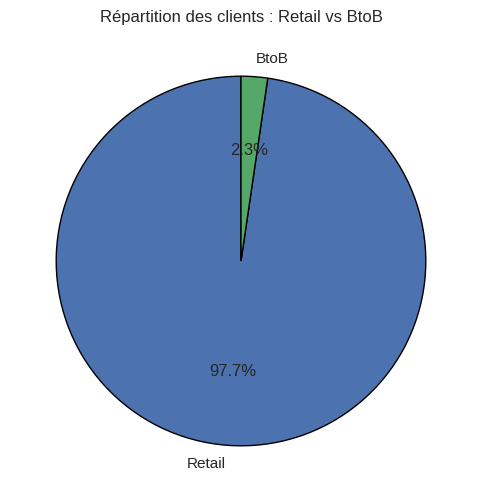

In [597]:
plt.figure(figsize=(6,6))
nb_clients.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=['#4C72B0', '#55A868'],  # Couleurs fixes pour Retail et BtoB
    labels=['Retail', 'BtoB'],
    wedgeprops={'edgecolor': 'black'}
)
plt.title("Répartition des clients : Retail vs BtoB")
plt.ylabel("")
plt.show()

##### Chiffre d'affaire

In [598]:
ca_par_type = clients.groupby('type')['CA'].sum()
print("Chiffre d'affaires total par type de client :")
print(ca_par_type)

Chiffre d'affaires total par type de client :
type
BtoB       1700062.87
Retail    10327600.23
Name: CA, dtype: float64


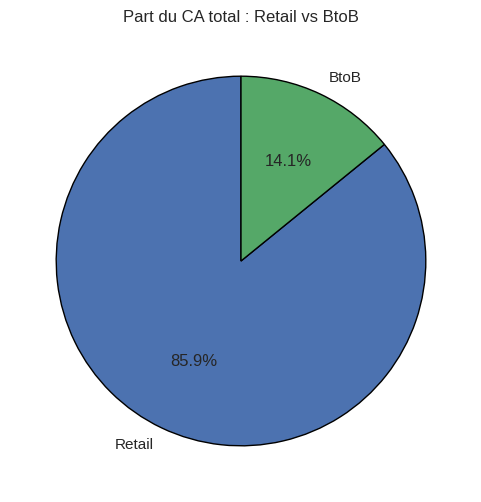

In [599]:
ca_par_type = ca_par_type.reindex(['Retail', 'BtoB'])

plt.figure(figsize=(6,6))
ca_par_type.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=['#4C72B0', '#55A868'],
    labels=['Retail', 'BtoB'],
    wedgeprops={'edgecolor': 'black'}
)
plt.title("Part du CA total : Retail vs BtoB")
plt.ylabel("")
plt.show()

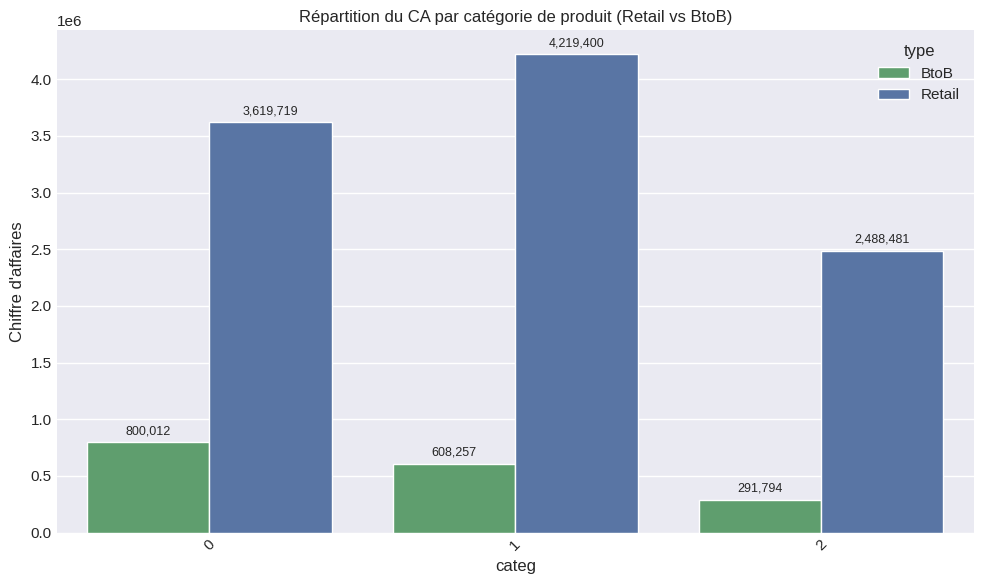

In [600]:
custom_palette = {
    'Retail': '#4C72B0',
    'BtoB': '#55A868'
}

df_merge = df_merge.merge(clients[['client_id', 'type']], on='client_id', how='left')
ca_categorie = df_merge.groupby(['type', 'categ'])['price'].sum().reset_index()

plt.figure(figsize=(10,6))
ax = sn.barplot(data=ca_categorie, x='categ', y='price', hue='type', palette=custom_palette)
plt.title("Répartition du CA par catégorie de produit (Retail vs BtoB)")
plt.ylabel("Chiffre d'affaires")
plt.xticks(rotation=45)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2,
                height + ca_categorie['price'].max() * 0.01,
                f'{height:,.0f}',
                ha='center',
                va='bottom',
                fontsize=9)

plt.tight_layout()
plt.show()




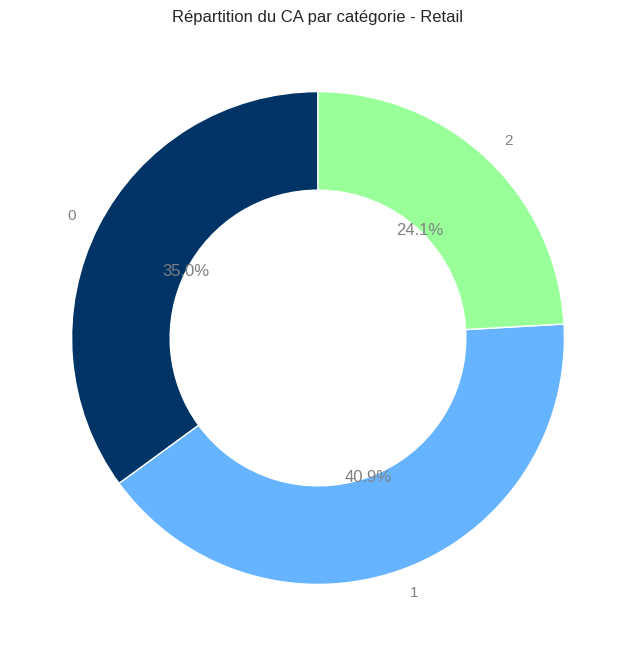

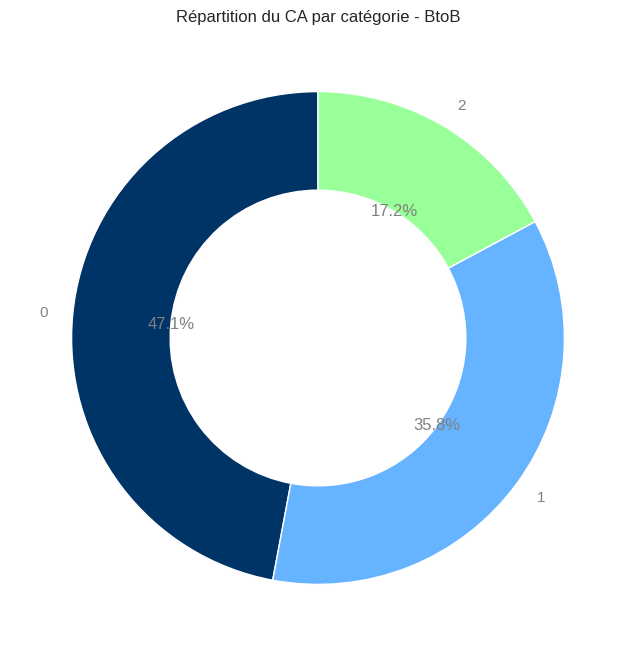

In [601]:
import matplotlib.pyplot as plt

category_colors = {
    0: '#003366',
    1: '#66b3ff',
    2: '#99ff99'
}

ca_categorie_retail = ca_categorie[ca_categorie['type'] == 'Retail']
ca_categorie_b2b = ca_categorie[ca_categorie['type'] == 'BtoB']

plt.figure(figsize=(8, 8))
plt.pie(
    ca_categorie_retail['price'],
    labels=ca_categorie_retail['categ'],
    autopct='%1.1f%%',
    textprops={'color':'gray'},
    startangle=90,
    colors=[category_colors[c] for c in ca_categorie_retail['categ']],
    wedgeprops={'edgecolor': 'white', 'width': 0.4}
)
plt.title("Répartition du CA par catégorie - Retail")
plt.gca().set_aspect('equal')
plt.show()

plt.figure(figsize=(8, 8))
plt.pie(
    ca_categorie_b2b['price'],
    labels=ca_categorie_b2b['categ'],
    autopct='%1.1f%%',
    textprops={'color':'gray'},
    startangle=90,
    colors=[category_colors[c] for c in ca_categorie_b2b['categ']],
    wedgeprops={'edgecolor': 'white', 'width': 0.4}
)
plt.title("Répartition du CA par catégorie - BtoB")
plt.gca().set_aspect('equal')
plt.show()



##### Ventes

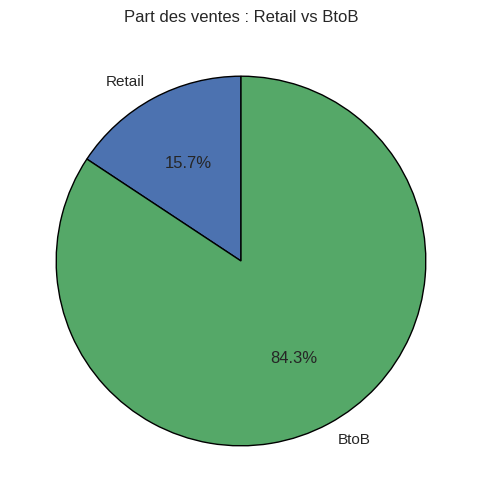

In [602]:
ventes_par_type = df_merge.groupby('type')['session_id'].count()

plt.figure(figsize=(6,6))
ventes_par_type.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=['#4C72B0', '#55A868'],  # Bleu Retail, Vert BtoB
    labels=['Retail', 'BtoB'],
    wedgeprops={'edgecolor': 'black'}
)
plt.title("Part des ventes : Retail vs BtoB")
plt.ylabel("")
plt.show()


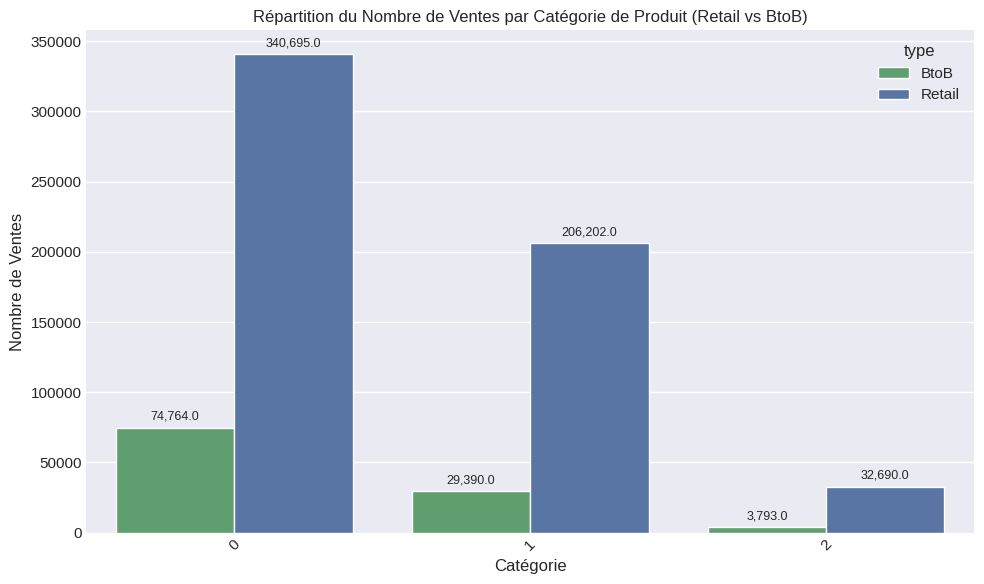

In [603]:
# Définir la palette personnalisée pour cohérence
custom_palette = {
    'Retail': '#4C72B0',  # Bleu
    'BtoB': '#55A868'     # Vert
}


# Calcul du nombre de ventes par catégorie et par type de client
ventes_categorie = df_merge.groupby(['type', 'categ'])['session_id'].count().reset_index()

# Affichage du graphique
plt.figure(figsize=(10,6))
ax = sn.barplot(data=ventes_categorie, x='categ', y='session_id', hue='type', palette=custom_palette)
plt.title("Répartition du Nombre de Ventes par Catégorie de Produit (Retail vs BtoB)")
plt.ylabel("Nombre de Ventes")
plt.xlabel("Catégorie")
plt.xticks(rotation=45)

# ➔ Ajout des chiffres sur les barres
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2,
                height + ventes_categorie['session_id'].max() * 0.01,
                f'{height:,}',  # Format avec séparateur de milliers
                ha='center',
                va='bottom',
                fontsize=9)

plt.tight_layout()
plt.show()


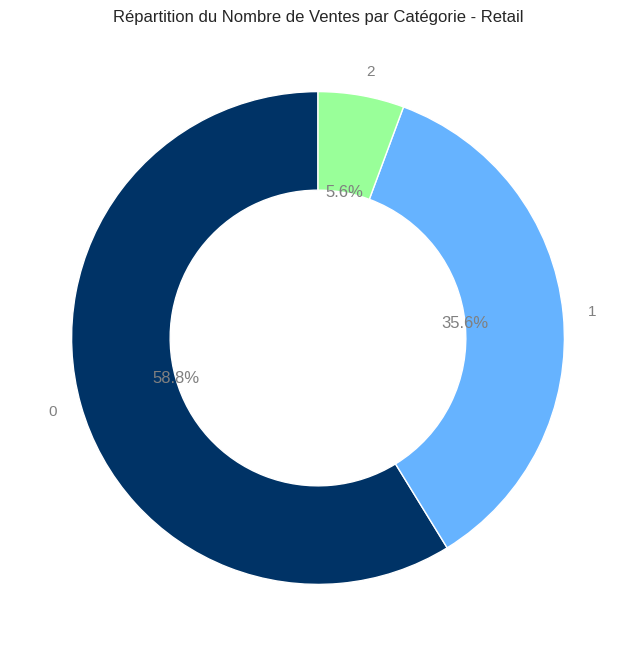

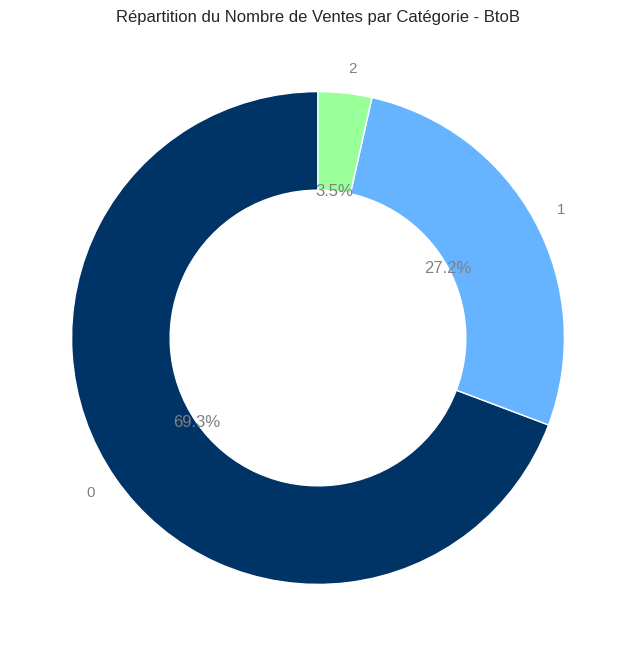

In [604]:

# 1️⃣ Palette de couleurs personnalisée (identique)
category_colors = {
    0: '#003366',  # Bleu foncé
    1: '#66b3ff',  # Bleu clair
    2: '#99ff99'   # Vert clair
}

# 3️⃣ Séparation Retail et BtoB
ventes_categorie_retail = ventes_categorie[ventes_categorie['type'] == 'Retail']
ventes_categorie_b2b = ventes_categorie[ventes_categorie['type'] == 'BtoB']

# 4️⃣ Graphique en donut pour Retail
plt.figure(figsize=(8, 8))
plt.pie(
    ventes_categorie_retail['session_id'],
    labels=ventes_categorie_retail['categ'],
    autopct='%1.1f%%',
    textprops={'color':'gray'},
    startangle=90,
    colors=[category_colors[c] for c in ventes_categorie_retail['categ']],
    wedgeprops={'edgecolor': 'white', 'width': 0.4}
)
plt.title("Répartition du Nombre de Ventes par Catégorie - Retail")
plt.gca().set_aspect('equal')
plt.show()

# 5️⃣ Graphique en donut pour BtoB
plt.figure(figsize=(8, 8))
plt.pie(
    ventes_categorie_b2b['session_id'],
    labels=ventes_categorie_b2b['categ'],
    autopct='%1.1f%%',
    textprops={'color':'gray'},
    startangle=90,
    colors=[category_colors[c] for c in ventes_categorie_b2b['categ']],
    wedgeprops={'edgecolor': 'white', 'width': 0.4}
)
plt.title("Répartition du Nombre de Ventes par Catégorie - BtoB")
plt.gca().set_aspect('equal')
plt.show()


### **7**) Analyse profil client

##### Calcul temps moyen entre 2 achats clients

In [605]:
clients_valides = df_merge.groupby('client_id').filter(lambda x: x['session_id'].nunique() >= 2)

temps_moyen = clients_valides.sort_values(['client_id', 'date'])\
                            .groupby('client_id')['date']\
                            .apply(lambda x: x.diff().mean().days)


print(f"Temps moyen entre 2 achats : {temps_moyen.mean():.0f} jours")
print(f"Mediane entre 2 achats : {temps_moyen.median():.0f} jours")
print(f"Ecart Type  : {temps_moyen.std():2f}")

Temps moyen entre 2 achats : 20 jours
Mediane entre 2 achats : 12 jours
Ecart Type  : 27.910580


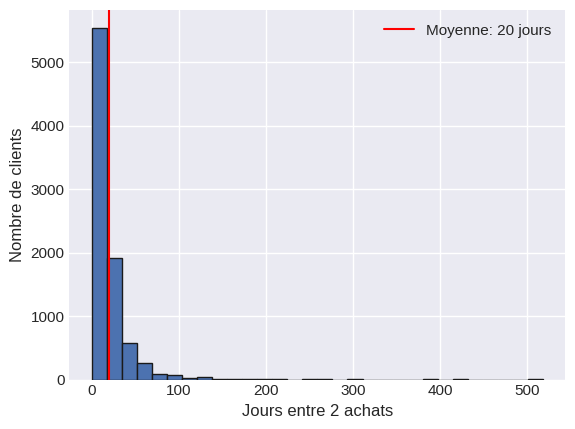

In [606]:
temps_par_client = clients_valides.groupby('client_id')['date']\
                                 .apply(lambda x: x.diff().mean().days)

plt.hist(temps_par_client.dropna(), bins=30, edgecolor='k')
plt.axvline(temps_par_client.mean(), color='red', label=f'Moyenne: {temps_par_client.mean():.0f} jours')
plt.xlabel("Jours entre 2 achats")
plt.ylabel("Nombre de clients")
plt.legend()
plt.show()

##### Courbe de lorentz: Client par rapport au CA

<ipython-input-607-238c24035dd3>:12: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  AUC_lorenz = np.trapz(ca_par_client['%_ca_cumul'], ca_par_client['%_clients_cumul'])


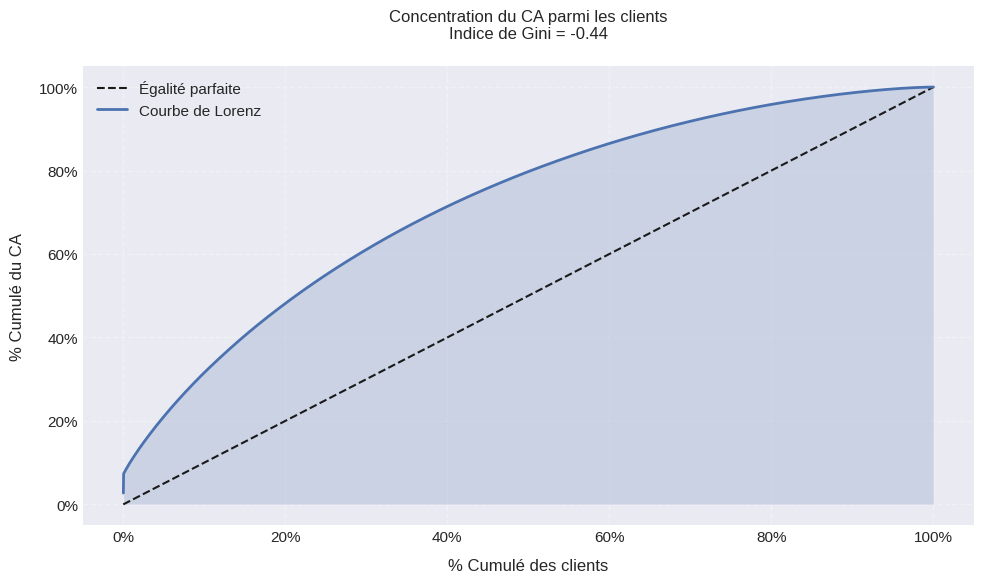

In [607]:

from matplotlib.ticker import PercentFormatter

ca_par_client = df_merge.groupby('client_id')['price'].sum().sort_values(ascending=False).reset_index()
ca_par_client['ca_cumul'] = ca_par_client['price'].cumsum()
ca_par_client['%_ca_cumul'] = ca_par_client['ca_cumul'] / ca_par_client['price'].sum() * 100
ca_par_client['%_clients_cumul'] = (ca_par_client.index + 1) / len(ca_par_client) * 100

plt.figure(figsize=(10, 6))
plt.plot([0, 100], [0, 100], 'k--', label='Égalité parfaite')  # Ligne de référence
plt.plot(ca_par_client['%_clients_cumul'], ca_par_client['%_ca_cumul'], 'b-', lw=2, label='Courbe de Lorenz')

AUC_lorenz = np.trapz(ca_par_client['%_ca_cumul'], ca_par_client['%_clients_cumul'])
AUC_perfect = 5000
gini = (AUC_perfect - AUC_lorenz) / AUC_perfect

plt.fill_between(ca_par_client['%_clients_cumul'], ca_par_client['%_ca_cumul'], alpha=0.2)
plt.title(f'Concentration du CA parmi les clients\nIndice de Gini = {gini:.2f}', pad=20)
plt.xlabel('% Cumulé des clients', labelpad=10)
plt.ylabel('% Cumulé du CA', labelpad=10)
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.gca().yaxis.set_major_formatter(PercentFormatter())
plt.gca().xaxis.set_major_formatter(PercentFormatter())
plt.tight_layout()
plt.show()

### 8) Segmentation des clients par RFM(Récence,Fréquence,Montant)

###### Calcul du score RFM par client

In [608]:
now = df_merge["date"].max()
rfm = df_merge.groupby("client_id").agg({
    "date": lambda x: (now - x.max()).days,
    "session_id": "nunique",
    "price": "sum"
}).reset_index()

rfm.columns = ["client_id", "Recence", "Frequence", "Montant"]

In [609]:
rfm["R_score"] = pd.qcut(rfm["Recence"], 5, labels=[5,4,3,2,1])
rfm["F_score"] = pd.qcut(rfm["Frequence"].rank(method="first"), 5, labels=[1,2,3,4,5])
rfm["M_score"] = pd.qcut(rfm["Montant"], 5, labels=[1,2,3,4,5])

rfm["RFM_score"] = rfm["R_score"].astype(str) + rfm["F_score"].astype(str) + rfm["M_score"].astype(str)

In [610]:
rfm.head()

client_id  Recence  Frequence  Montant R_score F_score M_score RFM_score
0       c_1       44         34   629.02       2       3       2       232
1      c_10       32         34  1353.60       2       3       4       234
2     c_100      161          5   254.85       1       1       1       111
3    c_1000       35         94  2291.88       2       5       5       255
4    c_1001        5         47  1823.85       4       4       4       444

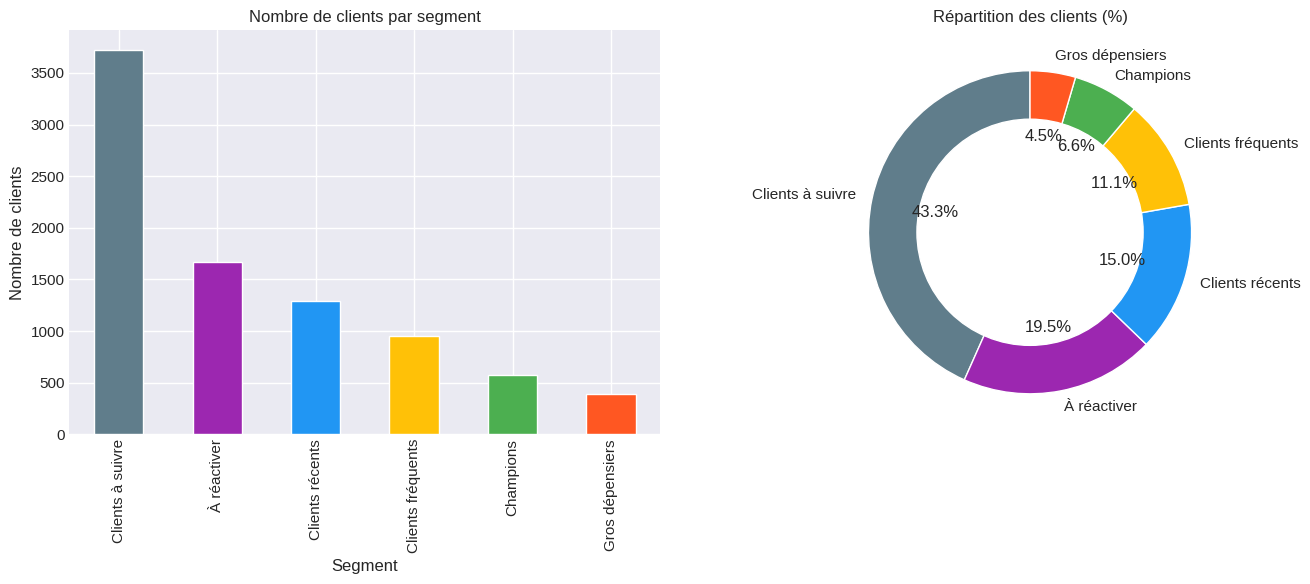

In [611]:
def segmenter(rfm_score):
    if rfm_score == "555":
        return "Champions"
    elif rfm_score[0] == "5":
        return "Clients récents"
    elif rfm_score[1] == "5":
        return "Clients fréquents"
    elif rfm_score[2] == "5":
        return "Gros dépensiers"
    elif rfm_score[0] == "1":
        return "À réactiver"
    else:
        return "Clients à suivre"

rfm["segment"] = rfm["RFM_score"].apply(segmenter)

segment_colors = {
    "Champions": "#4CAF50",
    "Clients récents": "#2196F3",
    "Clients fréquents": "#FFC107",
    "Gros dépensiers": "#FF5722",
    "À réactiver": "#9C27B0",
    "Clients à suivre": "#607D8B"
}

segment_counts = rfm["segment"].value_counts().sort_values(ascending=False)
segment_percent = (segment_counts / segment_counts.sum()) * 100
colors = [segment_colors[seg] for seg in segment_counts.index]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

segment_counts.plot(kind='bar', ax=ax1, color=colors)
ax1.set_title('Nombre de clients par segment')
ax1.set_ylabel('Nombre de clients')
ax1.set_xlabel('Segment')

wedges, texts, autotexts = ax2.pie(segment_percent, labels=segment_percent.index, autopct='%1.1f%%',
                                   startangle=90, colors=colors)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)
ax2.set_title('Répartition des clients (%)')

plt.tight_layout()
plt.show()



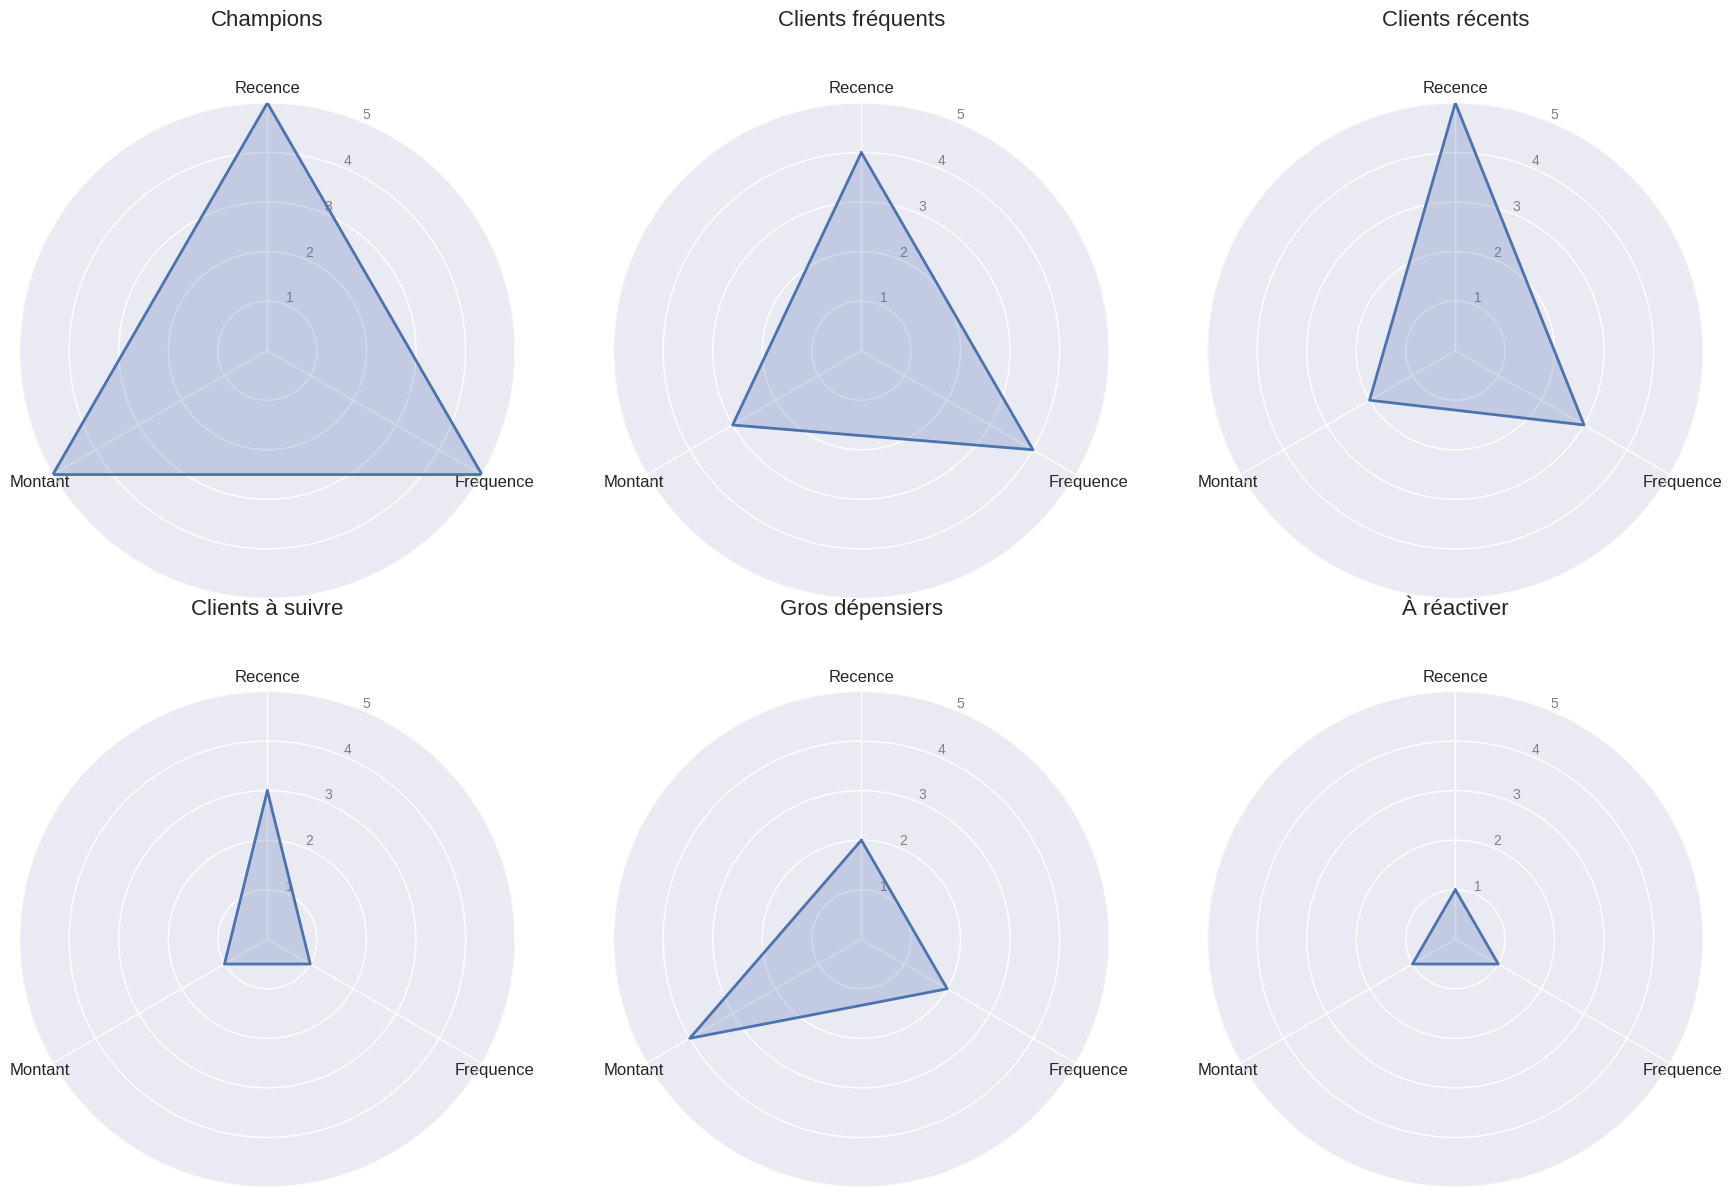

In [612]:
from math import pi

rfm_avg = rfm.groupby("segment")[["Recence", "Frequence", "Montant"]].mean()

for col in ["Recence", "Frequence", "Montant"]:
    rfm_avg[col] = pd.qcut(rfm_avg[col], 5, labels=[1, 2, 3, 4, 5]).astype(int)

rfm_avg["Recence"] = 6 - rfm_avg["Recence"]

categories = ["Recence", "Frequence", "Montant"]
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

segments = rfm_avg.index.tolist()
n_segments = len(segments)
n_cols = min(3, n_segments)
n_rows = (n_segments + n_cols - 1) // n_cols

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 6),
                        subplot_kw=dict(polar=True))

if n_segments == 1:
    axs = [axs]

axs = axs.flatten()

for i, segment in enumerate(segments):
    values = rfm_avg.loc[segment].tolist()
    values += values[:1]

    ax = axs[i]
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=12)
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=segment)
    ax.fill(angles, values, alpha=0.25)
    ax.set_yticks([1, 2, 3, 4, 5])
    ax.set_yticklabels(['1', '2', '3', '4', '5'], color='grey', size=10)
    ax.set_ylim(0, 5)
    ax.set_title(segment, size=16, y=1.1, pad=20)

for j in range(i + 1, len(axs)):
    axs[j].set_visible(False)

plt.tight_layout()
plt.show()

## V) Analyse de la clientèle

#### 0) Supression Outliers(Clients par rapport au CA généré ou Nombre de vente)

In [614]:
df_merge_ss_outliers=df_merge[df_merge["type"]=="Retail"]


1) Analyser la distribution-confirmation normal ou non
2) Effectuer un test statistiques(parametrique ou non parametriques)

#### 1) Corrélation Sexe & Catégorie de livre (2 variables quantitatives)





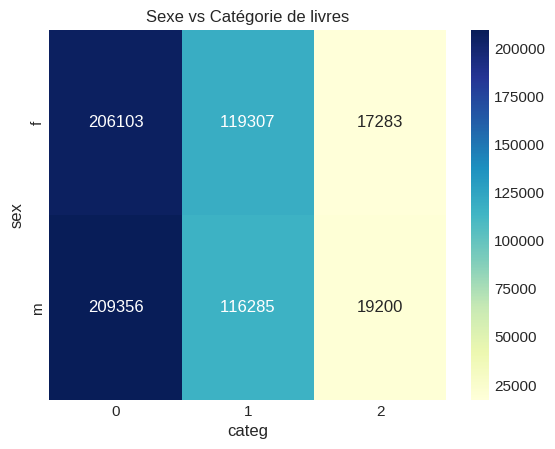

Statistique Chi-2: 158.25
Valeur p: 0.0
Degrés de liberté: 2
Fréquences attendues:
[[207080.50959953 117427.98066132  18184.50973915]
 [208378.49040047 118164.01933868  18298.49026085]]


In [615]:
from scipy.stats import chi2_contingency

contingence = pd.crosstab(df_merge['sex'], df_merge['categ'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingence)

sn.heatmap(contingence, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Sexe vs Catégorie de livres")
plt.show()

print(f"Statistique Chi-2: {round(chi2_stat,2)}")
print(f"Valeur p: {round(p_value,4)}")
print(f"Degrés de liberté: {dof}")
print("Fréquences attendues:")
print(expected)


#### 2) Corrélation age & Montant achat(2 quantitatives)

In [616]:
df_total = df_merge_ss_outliers.groupby('client_id').agg({
    'age': 'first',
    'price':'sum'
}).reset_index()


Analyse de la Distribution de la variable "age"

In [617]:
from scipy.stats import shapiro
c_value,p_value=shapiro(df_total["age"])
print(f"Coefficient corrélation :{c_value}")
print(f"p-value : {p_value}")

if p_value > 0.05:
    print("La distribution semble normale (on ne rejette pas H0).")
else:
    print("La distribution n'est pas normale (on rejette H0).")


Coefficient corrélation :0.9685728710268329
p-value : 2.7868186329145244e-39
La distribution n'est pas normale (on rejette H0).


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8401.
  res = hypotest_fun_out(*samples, **kwds)


Test de Spearman

Coefficient de corrélation:-0.18513
p_value:0.0


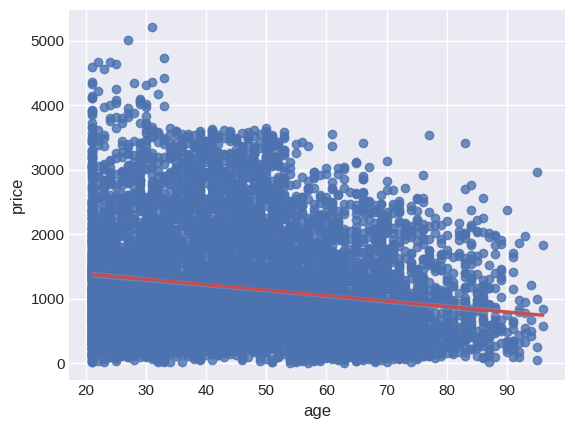

In [618]:
from scipy.stats import spearmanr

age=df_total["age"]
montant=df_total["price"]

s_corr,s_p_value=spearmanr(age,montant)
sn.regplot(data=df_total,x="age",y="price",robust=True, line_kws=dict(color="r"))
print(f"Coefficient de corrélation:{round(s_corr,5)}")
print(f"p_value:{round(s_p_value,5)}")

#### 3) Corrélation:  Age & Frequence d'achat(2 quantitatives)

In [619]:
df_frequence = df_merge_ss_outliers.groupby('client_id')['session_id'].nunique().reset_index(name='frequence')
df_frequence = df_frequence.merge(df_merge_ss_outliers[['client_id', 'age']].drop_duplicates(), on='client_id', how='left')



Coefficient de corrélation:0.2251262327213894
p_value : 0.0


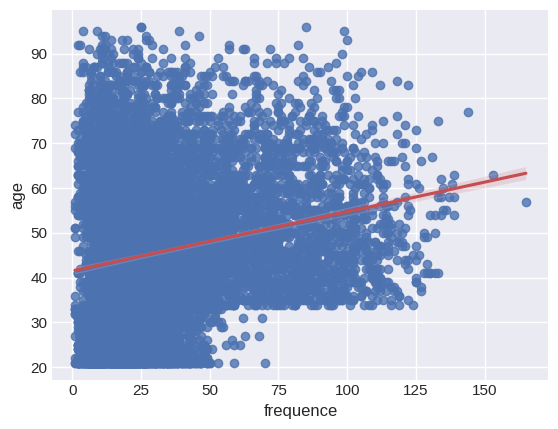

In [620]:
frequence=df_frequence["frequence"]
age=df_frequence["age"]
c_value,p_value=spearmanr(frequence,age)

sn.regplot(data=df_frequence,x="frequence",y="age",robust=True, line_kws=dict(color="r"))

print(f"Coefficient de corrélation:{c_value}")
print(f"p_value : {round(p_value,10)}")


#### 4) Corrélation  Age ↔ Taille du panier moyen (2 quantitatives)

Coefficient de corrélation:-0.7
Value-p :0.0


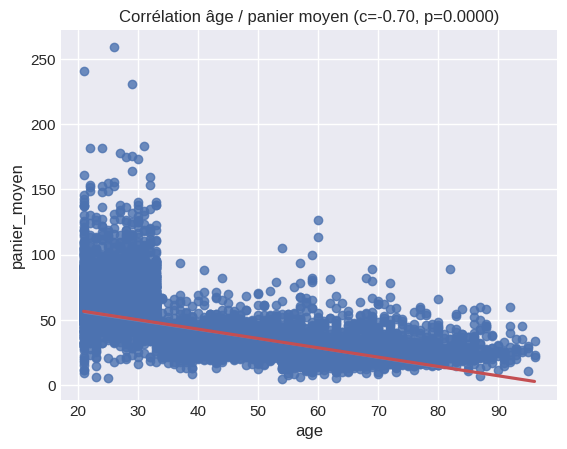

In [621]:
panier = df_merge.groupby('client_id').agg({
    'age': 'first',
    'price': 'sum',
    'session_id': 'nunique'
})

panier['panier_moyen'] = panier['price'] / panier['session_id']

c, p = spearmanr(panier['age'], panier['panier_moyen'])

print(f"Coefficient de corrélation:{round(c,2)}")
print(f"Value-p :{p}")

sn.regplot(data=panier, x='age', y='panier_moyen', robust=True, line_kws=dict(color="r"))

plt.title(f"Corrélation âge / panier moyen (c={c:.2f}, p={p:.4f})")
plt.show()



#### 5) Corrélation Âge ↔ Catégorie de livres (1quali | 1 quanti)

Test de corrélation(Krussal-Wallis-> Age ne suit pas une distribution normal)

In [622]:
from scipy.stats import kruskal

cat0 = df_merge_ss_outliers[df_merge_ss_outliers['categ'] == 0]['age']
cat1 = df_merge_ss_outliers[df_merge_ss_outliers['categ'] == 1]['age']
cat2 = df_merge_ss_outliers[df_merge_ss_outliers['categ'] == 2]['age']

H,p_value=kruskal(cat0,cat1,cat2)
n=df_merge_ss_outliers.shape[0]
k=3
print(f'Coefficient de corrélation: {H}')
print(f"p-value : {p_value}")

eta_squared =H/(n-1)

print(f" η²: {eta_squared}")

Coefficient de corrélation: 69535.39046091479
p-value : 0.0
 η²: 0.11997424102879432


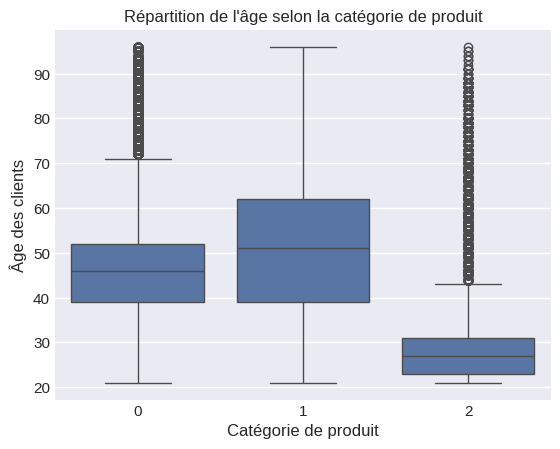

In [623]:


sn.boxplot(data=df_merge_ss_outliers, x='categ', y='age')
plt.title("Répartition de l'âge selon la catégorie de produit")
plt.xlabel("Catégorie de produit")
plt.ylabel("Âge des clients")
plt.show()